In [1]:
from os import path

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


#import seaborn as sns

import pickle

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#sns.set_style('whitegrid',{'axes.grid':False})

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [4]:
onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_onepercent_allLayers_EXCandINH_gids.txt")
tenpercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_tenpercent_allLayers_EXCandINH_gids.txt")


In [4]:
# gen Calv met one pulse

um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112211.txt",header=None)
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112212.txt",header=None)


um = pd.concat([um1,um2])
print((len(um1)+len(um2))/len(um) )

1.0


In [7]:
um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/atp2p8_gen_thal_um_2021030323.txt",sep="\t")

In [8]:
um1.head()

900   115  0  -65.0  0.015391567579385399  0.9002  0.1558  140.0  8.0  \
0   2719   376  0  -65.0              0.015392  0.9002  0.1558  140.0  8.0   
1  12517  1783  0  -65.0              0.015392  0.9002  0.1558  140.0  8.0   
2  11993  1712  0  -65.0              0.015392  0.9002  0.1558  140.0  8.0   
3   1568   223  0  -65.0              0.015392  0.9002  0.1558  140.0  8.0   
4   4788   681  0  -65.0              0.015392  0.9002  0.1558  140.0  8.0   

   10.24946517666297  5.473763402365676  4.5089251781777095  \
0          10.254438           5.530699            4.508925   
1          10.408414           5.857878            4.508925   
2          10.172624           5.357262            4.508925   
3          10.243236           5.547505            4.508925   
4          10.050454           5.025430            4.508925   

   1.2398646092919128  6.6669633903451695  0.0067  1.1901900140391541  \
0            1.239865            6.666963  0.0067             1.19019   
1            1.239865            6.666963  0.0067             1.19019   
2            1.239865            6.666963  0.0067             1.19019   
3            1.239865            6.666963  0.0067             1.19019   
4            1.239865            6.666963  0.0067             1.19019   

   1.29993127732263  0.04162975851596645  0.030366584444165665  \
0          1.299931              0.04163              0.030367   
1          1.299931              0.04163              0.030367   
2          1.299931              0.04163              0.030367   
3          1.299931              0.04163              0.030367   
4          1.299931              0.04163              0.030367   

   0.030019616565437474  1.1900654078806086  0.650300789830561  \
0              0.030019            1.190065           0.650301   
1              0.030018            1.190065           0.650300   
2              0.030020            1.190065           0.650301   
3              0.030019            1.190065           0.650301   
4              0.030021            1.190065           0.650301   

   1.2998693196500593  1.3001071521780263  0.3800077589188788  \
0            1.299869            1.300107            0.380008   
1            1.299869            1.300108            0.380008   
2            1.299869            1.300107            0.380008   
3            1.299869            1.300107            0.380008   
4            1.299869            1.300107            0.380008   

   0.3498840534321876  10.330218551158794  10.320540596954281  \
0            0.349884           10.330219           10.320540   
1            0.349884           10.330219           10.320539   
2            0.349884           10.330219           10.320541   
3            0.349884           10.330219           10.320540   
4            0.349884           10.330219           10.320543   

   8.144884120822459e-05  0.0005594030457215419  2.8046941255933997  \
0               0.000081               0.000560            2.804694   
1               0.000081               0.000561            2.804694   
2               0.000081               0.000559            2.804694   
3               0.000081               0.000560            2.804694   
4               0.000081               0.000557            2.804694   

   2.796050272453921  0.001605874406598403  0.016949727546080165  \
0           2.796040              0.001606              0.016960   
1           2.795979              0.001606              0.017021   
2           2.796070              0.001606              0.016930   
3           2.796037              0.001606              0.016963   
4           2.796121              0.001606              0.016879   

   0.00114462255017204  0.0011489537674589372  0.03005537744982796  \
0             0.001145               0.001149             0.030055   
1             0.001145               0.001149             0.030055   
2             0.001145               0.001149             0.030055   
3             0.001145    

In [9]:
# full met no stim
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/dis_um_2021052510.txt",header=None,sep="\t")

In [10]:
um_colnames = ["c_gid","mpi_rank","idxm","Pyr_n0", "PYRmito_n0", "ATP_a0", "AMP_a0", "ADP_a0", "SUCmito_n0", "Qmito_n0", "FUMmito_n0", "QH2mito_n0", "G6P_a0", "NADP_a0", "NADPH_a0", "GL6P_a0", "Pyr_a0", "PYRmito_a0", "NADHmito_a0", "Qmito_a0", "NADmito_a0", "QH2mito_a0", "GO6P_a0", "cAMP_a0", "ATP_n0", "Glc_n0", "ADP_n0", "G6P_n0", "AKGmito_a0", "ASPmito_a0", "OXAmito_a0", "GLUmito_a0", "PCr_n0", "Cr_n0", "NADP_n0", "NADPH_n0", "GL6P_n0", "ASPmito_n0", "GLU_n0", "GLUmito_n0", "ASP_n0", "PG2_n0", "PEP_n0", "SUCmito_a0", "FUMmito_a0", "MALmito_n0", "AKG_n0", "AKGmito_n0", "MAL_n0", "PG3_a0", "PG2_a0", "SUCCOAmito_a0", "ADPmito_a0", "ATPmito_a0", "CoAmito_a0", "PCr_a0", "Cr_a0", "bHB_ecs0", "bHB_n0", "f26bp_n0", "CoAmito_n0", "AcAcCoA_n0", "AcCoAmito_n0", "PEP_a0", "CITmito_n0", "ISOCITmito_n0", "Glc_b0", "GAP_a0", "DHAP_a0", "DHAP_n0", "GAP_n0", "K_a0", "K_out0", "GLY_a0", "G1P_a0", "ISOCITmito_a0", "MALmito_a0", "RU5P_a0", "R5P_a0", "F6P_a0", "f26bp_a0", "CytCredmito_n0", "CytCoxmito_n0", "R2CcAMP2_a0", "PKAa_a0", "R2CcAMP4_a0", "NADH_a0", "NAD_a0", "Lac_a0", "Lac_ecs0", "Lac_n0", "UTP0", "UDPgluco0", "Pi_n0", "Glc_ecs0", "Glc_a0", "GS_a0", "bHB_b0", "SUCCOAmito_n0", "AcAc_n0", "ddHb0", "GO6P_n0", "NADmito_n0", "NADHmito_n0", "PG3_n0", "MitoMembrPotent_a0", "NAD_n0", "OXA_n0", "NADH_n0", "GPb_a0", "GPa_a0", "O2cap0", "CaMito_n0", "GLN_a0", "GLN_out0", "R5P_n0", "X5P_n0", "S7P_n0", "PHKa_a0", "RU5P_n0", "GLN_n0", "PP1_a0", "BPG13_n0", "BPG13_a0", "ATPmito_n0", "ADPmito_n0", "Pimito_n0", "O2_n0", "FBP_a0", "MitoMembrPotent_n0", "F6P_n0", "FBP_n0", "CaMito_a0", "E4P_n0", "vV0", "Na_in0", "X5P_a0", "Pimito_a0", "GLUT_a0", "CytCoxmito_a0", "CytCredmito_a0", "PKAb_a0", "AMP_n0", "O2_a0", "AcCoAmito_a0", "OXAmito_n0", "CITmito_a0", "O2_ecs0", "GSH_a0", "GSSG_a0", "E4P_a0", "GABA_inh_n0", "Pi_a0", "Na_a0", "Va0", "Ca_a0", "GSH_n0", "GSSG_n0", "VNeu0", "S7P_a0", "GLUT_syn0", "Na_n0", "bHB_a0"]
print(len(um_colnames))

um.columns =  um_colnames

#um = um.add_prefix('with_met_')

163


In [5]:
# https://bbpgitlab.epfl.ch/molsys/metabolismndam/-/blob/main/sim/metabolism_unit_models/julia_gen_26feb2021.jl


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/new_ca1p25_gen_thal_um_2021030822.txt",header=None,sep="\t")

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/gen_nostim20_um_2021021318.txt",header=None,sep="\t")  # 1.4, t=195

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/met_gen_nostim_um_2021022017.txt",header=None,sep="\t") # 2.18, 100

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/test_um_2021022408.txt",header=None,sep="\t") # 2.18, 100

um.head()

0     1   2     3        4       5       6      7    8          9   \
0   9205  1321   0 -80.0  0.00211  0.9002  0.1558  140.0  8.0   9.995391   
1  10154  1455   0 -80.0  0.00211  0.9002  0.1558  140.0  8.0   9.995388   
2  10036  1442   0 -80.0  0.00211  0.9002  0.1558  140.0  8.0   9.996530   
3  11550  1641   0 -80.0  0.00211  0.9002  0.1558  140.0  8.0   9.995799   
4  10006  1441   0 -80.0  0.00211  0.9002  0.1558  140.0  8.0  10.067651   

         10        11        12        13      14        15        16  \
0  4.904190  4.959712  1.111689  8.937357  0.0067  1.190046  1.299935   
1  4.903645  4.959712  1.111689  8.937357  0.0067  1.190046  1.299935   
2  4.904857  4.959712  1.111689  8.937357  0.0067  1.190046  1.299935   
3  4.903166  4.959712  1.111689  8.937357  0.0067  1.190046  1.299935   
4  4.970019  4.959712  1.111689  8.937357  0.0067  1.190046  1.299934   

         17        18        19        20        21        22        23  \
0  0.040322  0.029178  0.029901  1.189857  0.650021  1.299994  1.299965   
1  0.040322  0.029178  0.029901  1.189857  0.650021  1.299994  1.300078   
2  0.040322  0.029178  0.029901  1.189857  0.650021  1.299994  1.300105   
3  0.040322  0.029178  0.029901  1.189857  0.650021  1.299994  1.300117   
4  0.040322  0.029178  0.029901  1.189857  0.650021  1.299994  1.300110   

         24        25         26         27        28        29        30  \
0  0.379989  0.350090  10.329131  10.320140  0.001169  0.000960  1.405072   
1  0.379989  0.349978  10.329131  10.320140  0.001169  0.000960  1.405072   
2  0.379989  0.349951  10.329131  10.320140  0.001169  0.000960  1.405072   
3  0.379989  0.349940  10.329131  10.320140  0.001169  0.000960  1.405072   
4  0.379989  0.349946  10.329131  10.320139  0.001169  0.000961  1.405067   

         31        32        33        34        35        36        37    38  \
0  1.399752  0.024928  0.013248  0.001145  0.001310  0.030055  0.029890  0.06   
1  1.399752  0.024928  0.013248  0.001145  0.001197  0.030055  0.030003  0.06   
2  1.399752  0.024928  0.013248  0.001145  0.001171  0.030055  0.030029  0.06   
3  1.399752  0.024928  0.013248  0.001145  0.001159  0.030055  0.030041  0.06   
4  1.399727  0.024933  0.013273  0.001145  0.001166  0.030055  0.030034  0.06   

     39  
0  0.06  
1  0.06  
2  0.06  
3  0.06  
4  0.06

In [6]:
len(um[0].unique()), len(um[2].unique())

(22918, 195)

In [7]:
inc = 0
notin = 0
for i in onepercent_gids:
    if int(i) in um[0].unique():
        inc +=1
    else:
        notin +=1

In [8]:
inc,notin


(230, 0)

In [9]:
len(onepercent_gids)

230

In [10]:
len(um.columns)

40

In [11]:
# ATP
um.loc[1,30],um.loc[1,31]

(1.4050722828633495, 1.3997516576197333)

In [12]:
# NADH
um.loc[1,34],um.loc[1,35]

(0.0011447623714485931, 0.00119728074010545)

In [13]:
# Glc
um.loc[1,20],um.loc[1,21]

(1.1898566003842703, 0.6500212779242329)

In [14]:
TnGlc = 83.33 # mM/s # 0.08333  #mM/ms# 
TnLac = 66.67 # mM/s # 0.06667  #mM/ms# 
TaGlc = 83.33 # mM/s # 0.08333 #mM/ms#
TaLac = 66.67 # mM/s # 0.06667 #mM/ms#
KbGlc = 4.60 # mM
KbLac = 5.00 # mM
KnGlc = 5.00 # mM
KnLac = 0.4 # mM
KaGlc = 12500.0 # mM
KaLac = 0.4 # mM

jGlc_n = TnGlc*( um.loc[0:um.shape[0]-1,15]/(um.loc[0:um.shape[0]-1,15] + KnGlc) - um.loc[0:um.shape[0]-1,20]/(um.loc[0:um.shape[0]-1,20] + KnGlc) )
jLac_n = TnLac*( um.loc[0:um.shape[0]-1,16]/(um.loc[0:um.shape[0]-1,16] + KnLac) - um.loc[0:um.shape[0]-1,22]/(um.loc[0:um.shape[0]-1,22] + KnLac) )
jGlc_a = TaGlc*( um.loc[0:um.shape[0]-1,15]/(um.loc[0:um.shape[0]-1,15] + KaGlc) - um.loc[0:um.shape[0]-1,21]/(um.loc[0:um.shape[0]-1,21] + KaGlc) )
jLac_a = TaLac*( um.loc[0:um.shape[0]-1,16]/(um.loc[0:um.shape[0]-1,16] + KaLac) - um.loc[0:um.shape[0]-1,23]/(um.loc[0:um.shape[0]-1,23] + KaLac) )


In [15]:
um.shape[0]

4469010

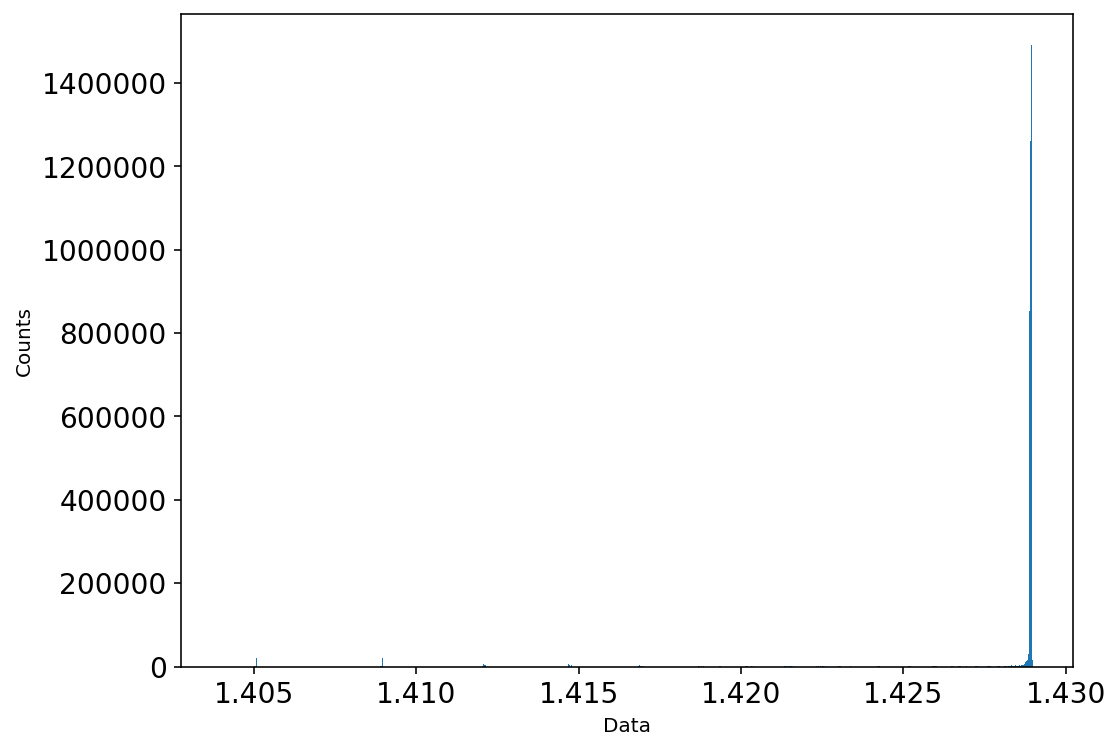

In [16]:

fig = plt.figure(figsize=(8, 6))

plt.hist(um[30], density=False, bins=1000)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

In [12]:
stats=pd.DataFrame()

stats["mean"]=um.mean()
stats["median"]=um.median()
stats["Std.Dev"]=um.std()
stats["Var"]=um.var()

stats = stats.reset_index()

stats = stats.drop(stats.index[[0,1,2]])

stats = stats.reset_index(drop=True)

stats.head()

index  mean  median       Std.Dev           Var
0      Pyr_n0  0.30    0.30  5.695324e-17  3.243671e-33
1  PYRmito_n0  0.40    0.40  5.695324e-17  3.243671e-33
2      ATP_a0  2.17    2.17  4.556259e-16  2.075950e-31
3      AMP_a0  0.01    0.01  0.000000e+00  0.000000e+00
4      ADP_a0  0.13    0.13  2.847662e-17  8.109179e-34

In [13]:
stats['CV'] = np.abs(stats['Std.Dev']/stats['mean'])*100

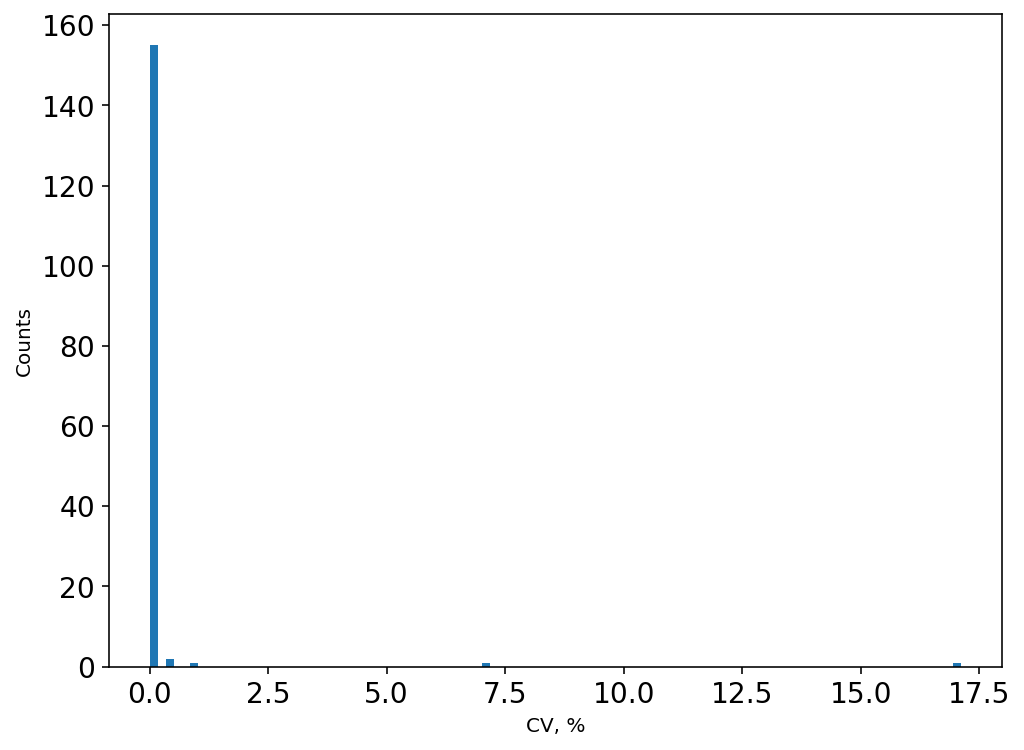

In [14]:
# what are the most variable features?

fig = plt.figure(figsize=(8, 6))

plt.hist(stats['CV'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('CV, %')

plt.grid(False)

plt.show()

#fig.savefig('plots/CV_within_4nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/CV_within_4nov2020.svg', transparent=True)


In [15]:
stats.loc[stats['CV']>50] # i.e. > 50%

Empty DataFrame
Columns: [index, mean, median, Std.Dev, Var, CV]
Index: []

In [ ]:
um_all.head()

In [18]:
um_all.columns[[168,169]]

Index(['with_met_GABA_inh_n', 'with_met_Vv'], dtype='object')

In [ ]:
um_all['diff_Na0in'] = um_all['with_met_Na0in'] - um_all['no_met_Na0in']

um_all['diff_K0out'] = um_all['with_met_K0out'] - um_all['no_met_K0out']

In [ ]:
um_all['diff_ATP_n'] = um_all['with_met_ATP_n'] - um_all['no_met_ATP_n']

In [21]:
um_all['diff_ADP_n'] = um_all['with_met_ADP_n'] - um_all['no_met_ADP_n']

In [22]:
np.max(um_all['diff_ATP_n'])

0.04080277836940982

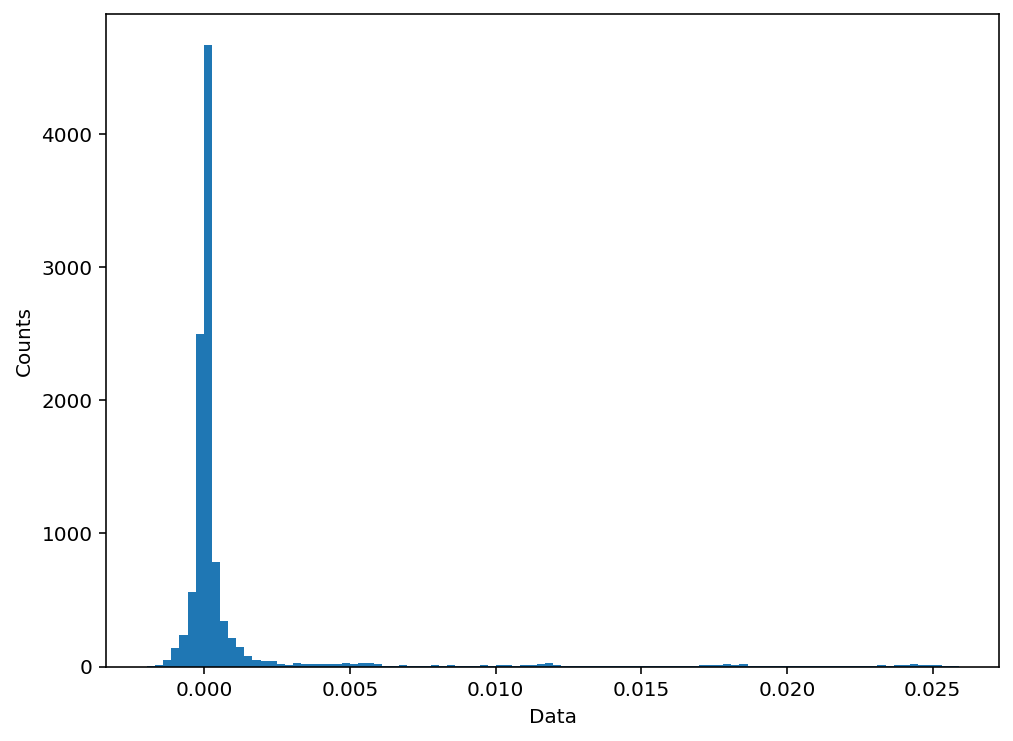

In [88]:

fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_K0out'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

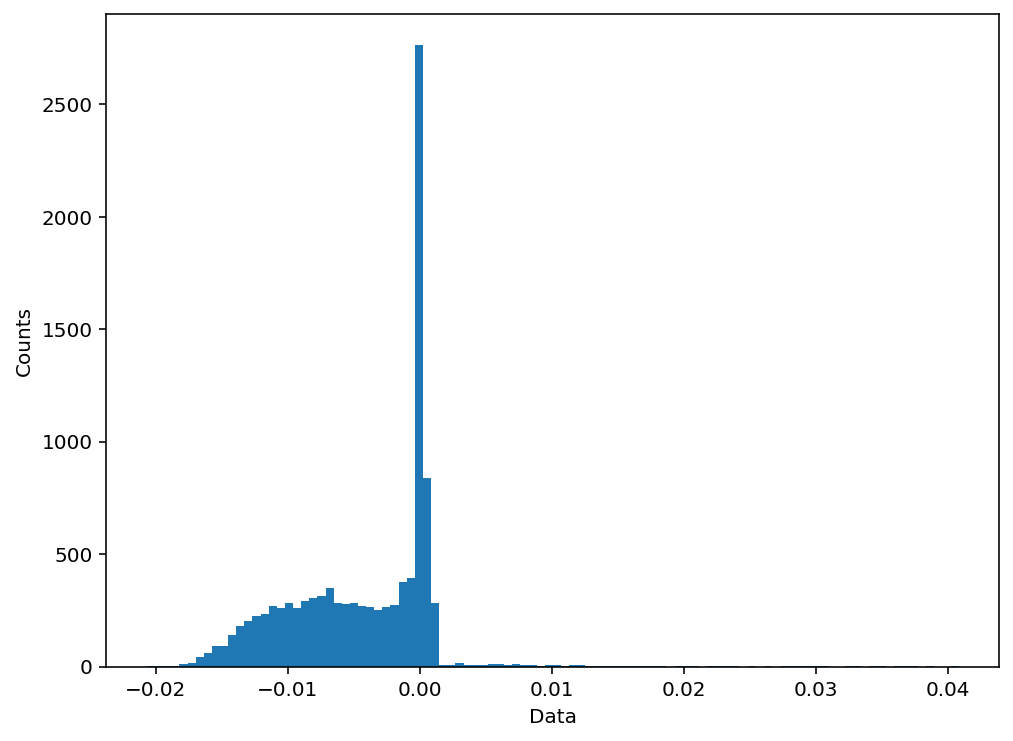

In [91]:
fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_ATP_n'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

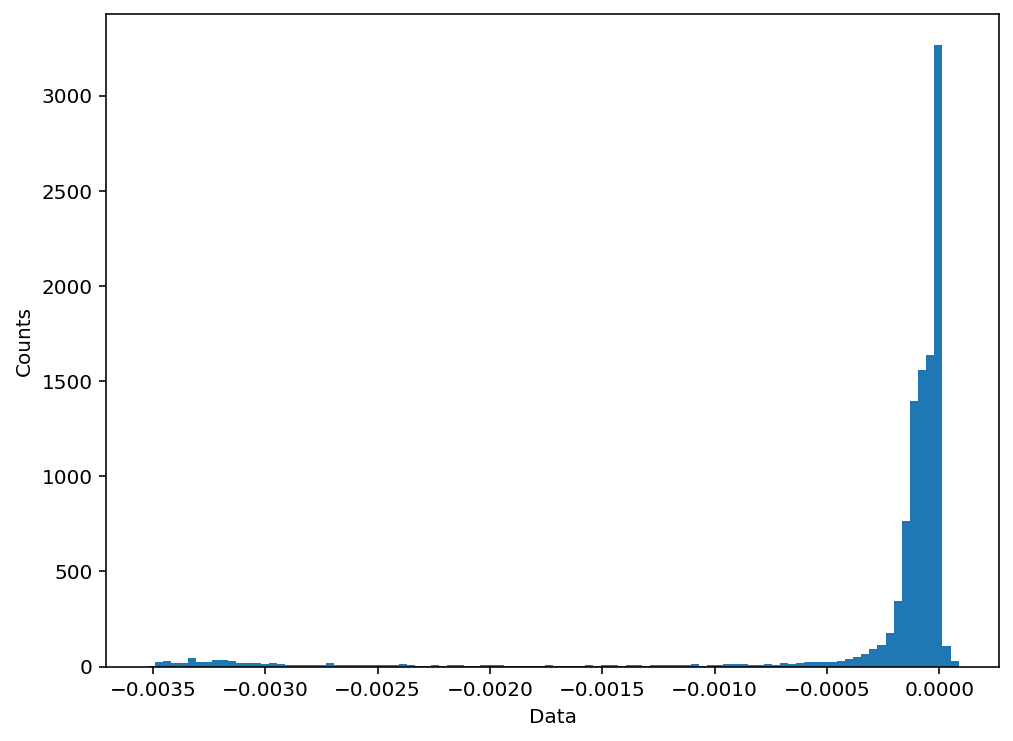

In [93]:
fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_ADP_n'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

In [ ]:
# need to run from command line: module load py-bluepy 

In [17]:
from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

In [18]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [19]:
l5tpca = c.cells.get({'$target': 'mc2_Column',Cell.MTYPE:'L5_TPC:A'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

l5mc = c.cells.get({'$target': 'mc2_Column',Cell.MTYPE:'L5_MC'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [20]:
l1 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L1'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l2 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L2'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l3 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L3'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l4 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L4'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l5 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L5'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l6 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L6'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [21]:
cells_layers_df = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.REGION,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [22]:
cells_layers_df.head()

region synapse_class etype   mtype  \
2      L1           INH  cNAC  L1_DAC   
3      L1           INH  cNAC  L1_DAC   
6      L1           INH  cNAC  L1_DAC   
11     L1           INH  cNAC  L1_DAC   
21     L1           INH  bNAC  L1_DAC   

                                             me_combo  
2   cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...  
3   cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...  
6   cNAC_L4CHC_L1_DAC_1_sm080723a1-4_idC_-_Scale_x...  
11               cNAC_L6NGC_L1_DAC_1_sm080723a1-4_idC  
21  bNAC_L23NGC_L1_DAC_1_sm100513a1-3_idC_-_Scale_...

In [23]:
EXC_mc2ids = c.cells.ids({'$target': 'mc2_Column',  Cell.SYNAPSE_CLASS: "EXC"})
INH_mc2ids = c.cells.ids({'$target': 'mc2_Column',  Cell.SYNAPSE_CLASS: "INH"})

In [24]:
from bluepy.v2.enums import Synapse

In [26]:
c.connectome.available_properties

{<Synapse.AXONAL_DELAY: 'axonal_delay'>,
 <Synapse.DTC: 'DTC'>,
 <Synapse.D_SYN: 'd_syn'>,
 <Synapse.F_SYN: 'f_syn'>,
 <Synapse.G_SYNX: 'g_synx'>,
 <Synapse.NRRP: 'NRRP'>,
 <Synapse.POST_BRANCH_ORDER: 'post_branch_order'>,
 <Synapse.POST_BRANCH_TYPE: 'post_branch_type'>,
 <Synapse.POST_GID: 'post_gid'>,
 <Synapse.POST_SECTION_ID: 'post_section_id'>,
 <Synapse.POST_X_CENTER: 'post_x_center'>,
 <Synapse.POST_X_CONTOUR: 'post_x_contour'>,
 <Synapse.POST_Y_CENTER: 'post_y_center'>,
 <Synapse.POST_Y_CONTOUR: 'post_y_contour'>,
 <Synapse.POST_Z_CENTER: 'post_z_center'>,
 <Synapse.POST_Z_CONTOUR: 'post_z_contour'>,
 <Synapse.PRE_BRANCH_ORDER: 'pre_branch_order'>,
 <Synapse.PRE_GID: 'pre_gid'>,
 <Synapse.PRE_SECTION_ID: 'pre_section_id'>,
 <Synapse.PRE_X_CENTER: 'pre_x_center'>,
 <Synapse.PRE_X_CONTOUR: 'pre_x_contour'>,
 <Synapse.PRE_Y_CENTER: 'pre_y_center'>,
 <Synapse.PRE_Y_CONTOUR: 'pre_y_contour'>,
 <Synapse.PRE_Z_CENTER: 'pre_z_center'>,
 <Synapse.PRE_Z_CONTOUR: 'pre_z_contour'>,
 <Synap

In [28]:
selected_cell = l5.loc[l5['mtype']=='L5_TPC:A',:].index[0]
selected_cell

147760

In [29]:
connections_l5tpca1 = list(c.connectome.afferent_gids(gid=selected_cell))

connections_l5tpca1_eff = list(c.connectome.efferent_gids(gid=selected_cell))

In [34]:
connections_l5tpca1_prop =  c.cells.get(connections_l5tpca1,properties=[Cell.MTYPE, Cell.SYNAPSE_CLASS])
connections_l5tpca1_prop_eff =  c.cells.get(connections_l5tpca1_eff,properties=[Cell.MTYPE, Cell.SYNAPSE_CLASS])

In [35]:
connections_l5tpca1_prop.head(10)

mtype synapse_class
2      L1_DAC           INH
31     L1_DAC           INH
62     L1_DAC           INH
138    L1_DAC           INH
246    L1_DAC           INH
254    L1_DAC           INH
500  L3_TPC:A           EXC
562  L3_TPC:A           EXC
664  L3_TPC:A           EXC
724  L3_TPC:A           EXC

In [36]:
connections_l5tpca1_prop_eff.head(10)

mtype synapse_class
28494  L6_BPC           EXC
28606  L6_BPC           EXC
28662  L6_BPC           EXC
28726  L6_BPC           EXC
29106  L6_BPC           EXC
29177  L6_BPC           EXC
29196  L6_BPC           EXC
29338  L6_BPC           EXC
29382  L6_BPC           EXC
29529  L6_BPC           EXC

### Metabolic fitness

In [25]:
# https://bbpgitlab.epfl.ch/molsys/metabolismndam/-/blob/main/sim/metabolism_unit_models/julia_gen_26feb2021.jl


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/new_ca1p25_gen_thal_um_2021030822.txt",header=None,sep="\t")
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/gen_nostim20_um_2021021318.txt",header=None,sep="\t")  # 1.4, t=195
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/met_gen_nostim_um_2021022017.txt",header=None,sep="\t") # 2.18, 100

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/test_um_2021022408.txt",header=None,sep="\t") # 2.18, 100

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/met_gen_lin1_um_2021022108.txt",header=None,sep="\t")
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/met_gen_lin1long_um_2021022120.txt",header=None,sep="\t")
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/met_gen_lin10_um_2021022209.txt",header=None,sep="\t")


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/gen_nostim_um_2021021520.txt",header=None,sep="\t")


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/gen_ns10_um_2021022611.txt",header=None,sep="\t")

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/gen_ns10_um_2021022611.txt",header=None,sep="\t")

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ndam2021/new50_ca1p25_gen_thal_um_2021031309.txt",header=None,sep="\t")

um.head()

0     1   2     3         4       5       6      7    8          9   \
0  14992  2113   0 -65.0  0.015392  0.9002  0.1558  140.0  8.0  10.294380   
1   5646   798   0 -65.0  0.015392  0.9002  0.1558  140.0  8.0  10.527933   
2   3469   493   0 -65.0  0.015392  0.9002  0.1558  140.0  8.0  10.159875   
3   7338  1064   0 -65.0  0.015392  0.9002  0.1558  140.0  8.0  10.412367   
4   7041  1015   0 -65.0  0.015392  0.9002  0.1558  140.0  8.0  10.693076   

         10        11        12        13      14        15        16  \
0  5.578439  4.508923  1.239883  6.666939  0.0067  1.188667  1.301715   
1  6.158557  4.508923  1.239886  6.666938  0.0067  1.188494  1.301959   
2  5.331062  4.508923  1.239884  6.666939  0.0067  1.188599  1.301810   
3  5.926882  4.508923  1.239886  6.666938  0.0067  1.188497  1.301955   
4  6.616124  4.508923  1.239886  6.666938  0.0067  1.188495  1.301958   

         17        18        19        20        21        22        23  \
0  0.041182  0.024375  0.029844  1.187393  0.650234  1.304388  1.300888   
1  0.041175  0.024290  0.029841  1.187086  0.650233  1.304997  1.300991   
2  0.041179  0.024339  0.029845  1.187272  0.650235  1.304627  1.300927   
3  0.041175  0.024291  0.029842  1.187091  0.650233  1.304988  1.300989   
4  0.041175  0.024290  0.029838  1.187088  0.650231  1.304994  1.300992   

         24        25         26         27        28        29        30  \
0  0.378978  0.349868  10.297215  10.320422  0.033085  0.000678  1.640731   
1  0.378946  0.349868  10.262202  10.320417  0.068098  0.000683  1.315961   
2  0.378964  0.349868  10.288107  10.320423  0.042193  0.000677  1.533157   
3  0.378946  0.349868  10.263220  10.320419  0.067080  0.000681  1.310596   
4  0.378946  0.349868  10.262598  10.320413  0.067702  0.000687  1.317848   

         31        32        33        34       35        36       37    38  \
0  2.167177  0.567239  0.015823  0.001152  0.00115  0.030048  0.03005  0.06   
1  2.167063  0.942801  0.015937  0.001153  0.00115  0.030047  0.03005  0.06   
2  2.167219  0.677733  0.015781  0.001152  0.00115  0.030048  0.03005  0.06   
3  2.167112  0.924638  0.015888  0.001153  0.00115  0.030047  0.03005  0.06   
4  2.166952  0.938608  0.016048  0.001153  0.00115  0.030047  0.03005  0.06   

     39  
0  0.06  
1  0.06  
2  0.06  
3  0.06  
4  0.06

In [26]:
len(um[0].unique()), len(um[2].unique()), len(um.columns)

(22540, 6, 40)

In [27]:
min(um.loc[:,30]),max(um.loc[:,30]), np.median(um.loc[:,30]), np.percentile(um.loc[:,30],10)

(1.2825726150223316, 2.204928892450724, 2.1311709694377727, 1.7381699194910645)

In [28]:
min(um.loc[um[2]<3,32]) #,max(um.loc[:,32]), np.median(um.loc[:,32]), np.percentile(um.loc[:,32],10)

0.0015982229853145349

In [29]:
# ADP 
min(um.loc[:,32]),max(um.loc[:,32]), np.median(um.loc[:,32]), np.percentile(um.loc[:,32],10)

(0.0013500411195110644,
 0.9967462760147706,
 0.07521828099748934,
 0.011172956537863647)

In [30]:
min(um.loc[:,36]),max(um.loc[:,36]), np.median(um.loc[:,36]), np.percentile(um.loc[:,36],10)

(0.02995718850140203,
 0.03005457198168368,
 0.030035036333815587,
 0.030003694922421064)

In [31]:
# ATP
um.loc[1,30],um.loc[1,31]

(1.3159614949670502, 2.1670630519794583)

In [32]:
# NADH
um.loc[1,34],um.loc[1,35],um.loc[1,36],um.loc[1,37]

(0.0011526347733730648,
 0.0011497457770084415,
 0.030047365226626925,
 0.030050254222991568)

In [33]:
# Glc
um.loc[1,20],um.loc[1,21]

(1.187085892383656, 0.6502327139477514)

In [34]:
min(um.loc[:,30]),max(um.loc[:,30])

(1.2825726150223316, 2.204928892450724)

In [35]:
min(um.loc[:,31]),max(um.loc[:,31])

(2.156923658832401, 2.1672724115443387)

In [36]:
min(um.loc[:,32]),max(um.loc[:,32]), np.median(um.loc[:,32]), np.percentile(um.loc[:,32],10)

(0.0013500411195110644,
 0.9967462760147706,
 0.07521828099748934,
 0.011172956537863647)

In [37]:
min(um.loc[:,33]),max(um.loc[:,33])

(0.015727588455661513, 0.026076341167600943)

In [38]:
min(um.loc[:,34]),max(um.loc[:,34])

(0.0011454280183163426, 0.001242811498597982)

In [39]:
TnGlc = 83.33 # mM/s # 0.08333  #mM/ms# 
TnLac = 66.67 # mM/s # 0.06667  #mM/ms# 
TaGlc = 83.33 # mM/s # 0.08333 #mM/ms#
TaLac = 66.67 # mM/s # 0.06667 #mM/ms#
KbGlc = 4.60 # mM
KbLac = 5.00 # mM
KnGlc = 5.00 # mM
KnLac = 0.4 # mM
KaGlc = 12500.0 # mM
KaLac = 0.4 # mM

jGlc_n = TnGlc*( um.loc[0:um.shape[0]-1,15]/(um.loc[0:um.shape[0]-1,15] + KnGlc) - um.loc[0:um.shape[0]-1,20]/(um.loc[0:um.shape[0]-1,20] + KnGlc) )
jLac_n = TnLac*( um.loc[0:um.shape[0]-1,16]/(um.loc[0:um.shape[0]-1,16] + KnLac) - um.loc[0:um.shape[0]-1,22]/(um.loc[0:um.shape[0]-1,22] + KnLac) )
jGlc_a = TaGlc*( um.loc[0:um.shape[0]-1,15]/(um.loc[0:um.shape[0]-1,15] + KaGlc) - um.loc[0:um.shape[0]-1,21]/(um.loc[0:um.shape[0]-1,21] + KaGlc) )
jLac_a = TaLac*( um.loc[0:um.shape[0]-1,16]/(um.loc[0:um.shape[0]-1,16] + KaLac) - um.loc[0:um.shape[0]-1,23]/(um.loc[0:um.shape[0]-1,23] + KaLac) )


In [40]:
conn_all_d = {}
conn_aff_d = {}
conn_eff_d = {}

all_gids = um[0].unique()

for selected_cell in all_gids:
    
    connections_aff = len(list(c.connectome.afferent_gids(gid=selected_cell)))
    connections_eff = len(list(c.connectome.efferent_gids(gid=selected_cell)))

    conn_aff_d[selected_cell] = connections_aff
    conn_eff_d[selected_cell] = connections_eff
    
    conn_all_d[selected_cell] = connections_aff + connections_eff
    

In [41]:
max(conn_aff_d, key=conn_aff_d.get)

136615

In [42]:
max(conn_aff_d.items(), key = lambda k : k[1])

(136615, 2543)

In [43]:
max(conn_eff_d.items(), key = lambda k : k[1])

(132133, 3135)

In [44]:
max(conn_all_d.items(), key = lambda k : k[1])

(136122, 4109)

In [45]:
jGlc_n_d = {} #TnGlc*( um.loc[0:um.shape[0]-1,15]/(um.loc[0:um.shape[0]-1,15] + KnGlc) - um.loc[0:um.shape[0]-1,20]/(um.loc[0:um.shape[0]-1,20] + KnGlc) )
jLac_n_d = {} #TnLac*( um.loc[0:um.shape[0]-1,16]/(um.loc[0:um.shape[0]-1,16] + KnLac) - um.loc[0:um.shape[0]-1,22]/(um.loc[0:um.shape[0]-1,22] + KnLac) )


for selected_cell in all_gids:
    
    
    #um_cell = um.loc[um[0] == selected_cell,:]
    
    
    jGlc_n_d[selected_cell] = np.median( TnGlc*(um.loc[um[0] == selected_cell,15]/(um.loc[um[0] == selected_cell,15]  + KnGlc) - um.loc[um[0] == selected_cell,20]/(um.loc[um[0] == selected_cell,20] + KnGlc )   ) ) 
    
    jLac_n_d[selected_cell] = np.median( TnLac*(um.loc[um[0] == selected_cell,16]/(um.loc[um[0] == selected_cell,16]  + KnLac) - um.loc[um[0] == selected_cell,22]/(um.loc[um[0] == selected_cell,22] + KnLac ))  )
    
                            
    

# calc fitness

mf = {}
aec = {}
redox = {}

coeff_substr_input = 1/np.median(jGlc_n)
coeff_ros_output   = 1/np.median(um.loc[0:um.shape[0],36]/um.loc[0:um.shape[0],34])

for selected_cell in all_gids:
    
    um_cell = um.loc[um[0] == selected_cell,:]
    
    mf[selected_cell] = (conn_all_d[selected_cell]*( np.median((um_cell[30] + 0.5*um_cell[32])/(um_cell[30] + um_cell[32])) )) / ( coeff_substr_input*jGlc_n_d[selected_cell]  + coeff_ros_output*np.median(um_cell[36]/um_cell[34]))
    
    aec[selected_cell] =  np.median((um_cell[30] + 0.5*um_cell[32])/(um_cell[30] + um_cell[32]))
    
    redox[selected_cell] = np.median(um_cell[36]/um_cell[34])
    
    

In [46]:
max(conn_all_d.items(), key = lambda k : k[1])[1]

4109

In [159]:
# calc fitness

mf = {}
mf2 = {}
aec = {}
redox = {}

coeff_substr_input = 1/np.median(jGlc_n)
coeff_ros_output   = 1/np.median(um.loc[0:um.shape[0],36]/um.loc[0:um.shape[0],34])

max_n_conn = max(conn_all_d.items(), key = lambda k : k[1])[1]

for selected_cell in all_gids:
    
    um_cell = um.loc[um[0] == selected_cell,:]
    
    mf[selected_cell] = ((conn_all_d[selected_cell]/max_n_conn)*( np.median((um_cell[30])/(um_cell[32])) )) / ( coeff_substr_input*jGlc_n_d[selected_cell]  + coeff_ros_output*np.median(um_cell[36]/um_cell[34]))
    mf2[selected_cell] = (( np.median((um_cell[30])/(um_cell[32])) )) / ( coeff_substr_input*jGlc_n_d[selected_cell]  + coeff_ros_output*np.median(um_cell[36]/um_cell[34]))
    
    
    
    aec[selected_cell] =  np.median((um_cell[30])/(um_cell[32]))
    
    redox[selected_cell] = np.median(um_cell[36]/um_cell[34])
    
    

In [48]:
min(mf.items(), key = lambda k : k[1])

(116584, 0.09562559336972987)

In [49]:
min(aec.items(), key = lambda k : k[1])

(109935, 3.834124357301936)

In [50]:
max(aec.items(), key = lambda k : k[1])

(94411, 1379.4710394790404)

In [51]:
um_cell = um.loc[um[0] == 132133,:]

In [52]:
np.min((um_cell[30])/(um_cell[32]))

3.5286974921931025

In [53]:
np.percentile(list(redox.values()),5)

25.401236766657714

In [54]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


In [55]:
# define dataset
dfX, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


In [117]:
fitl = []
ids = []
for i in cells_layers.keys():
    
    if i in redox:
        ids.append(cells_types[i])
        fitl.append([jGlc_n_d[i]/conn_all_d[i], redox[i]/conn_all_d[i], aec[i]/conn_all_d[i] ])
    

In [118]:
X = np.array(fitl)

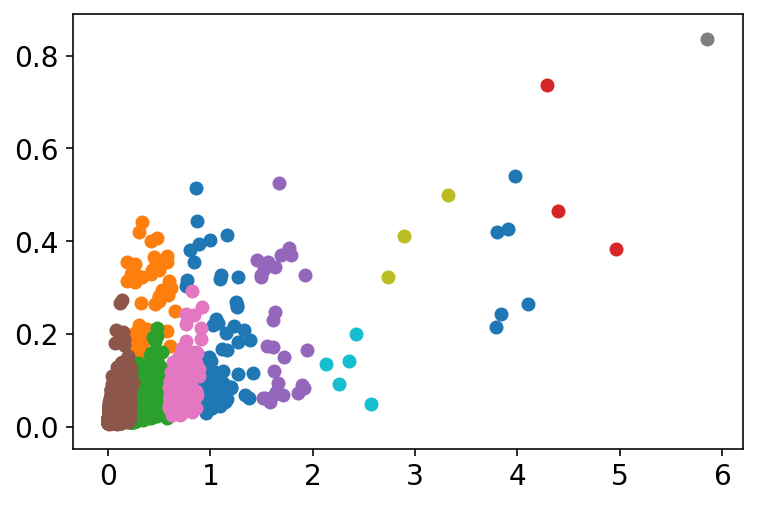

In [119]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

# define the model
model = Birch(threshold=0.01, n_clusters=11)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 2], X[row_ix, 1])
# show the plot
pyplot.show()

4


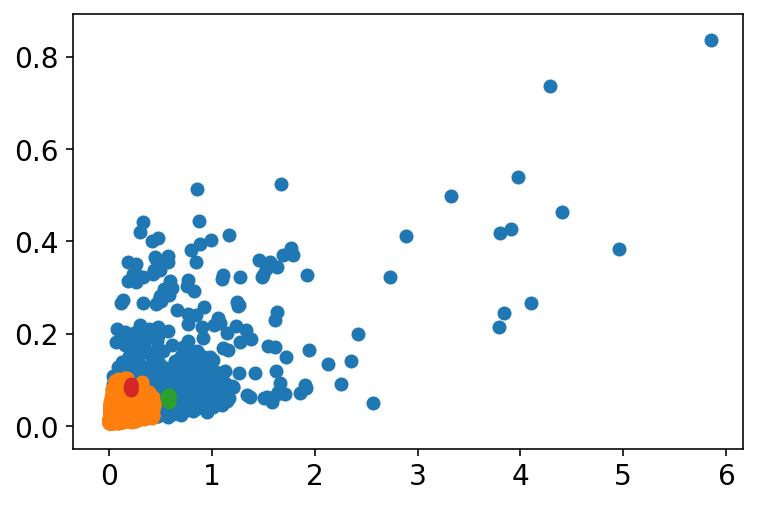

In [131]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot


# define the model
#model = DBSCAN(eps=0.30, min_samples=9)
model = DBSCAN(eps=0.01, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
print(len(clusters))

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 2], X[row_ix, 1])
# show the plot
pyplot.show()

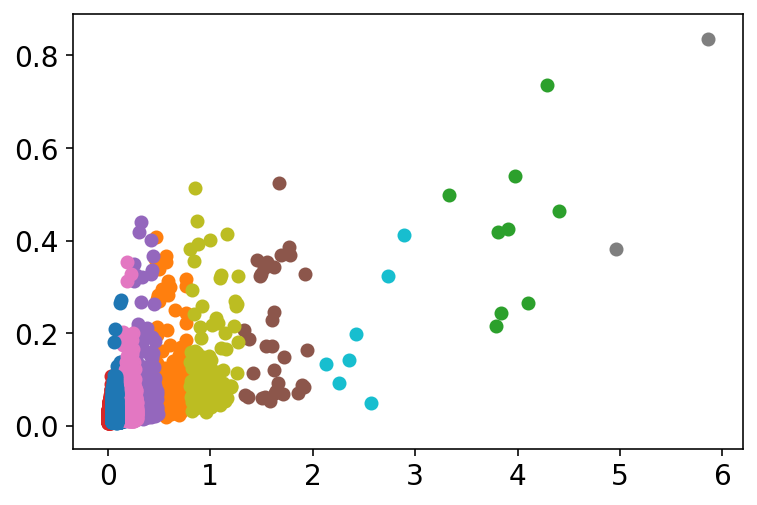

In [121]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


# define the model
model = KMeans(n_clusters=11)

# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 2], X[row_ix, 1])
# show the plot
pyplot.show()

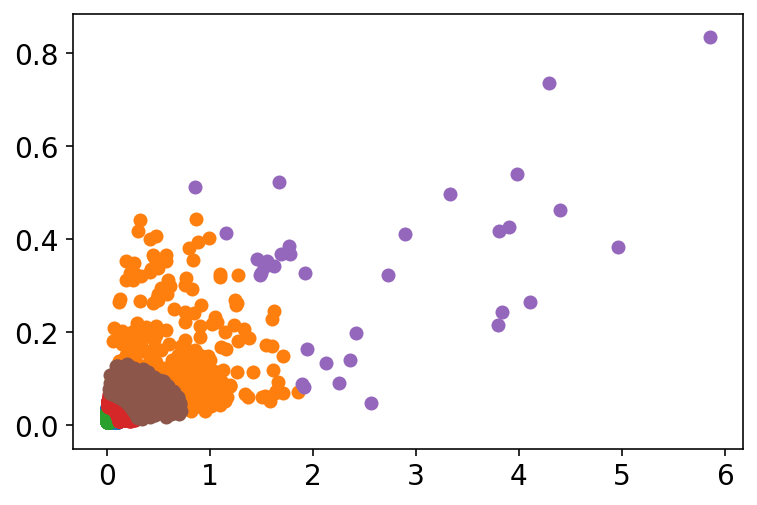

In [130]:
# define the model
model = GaussianMixture(n_components=6)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 2], X[row_ix, 1])

    # show the plot
pyplot.show()

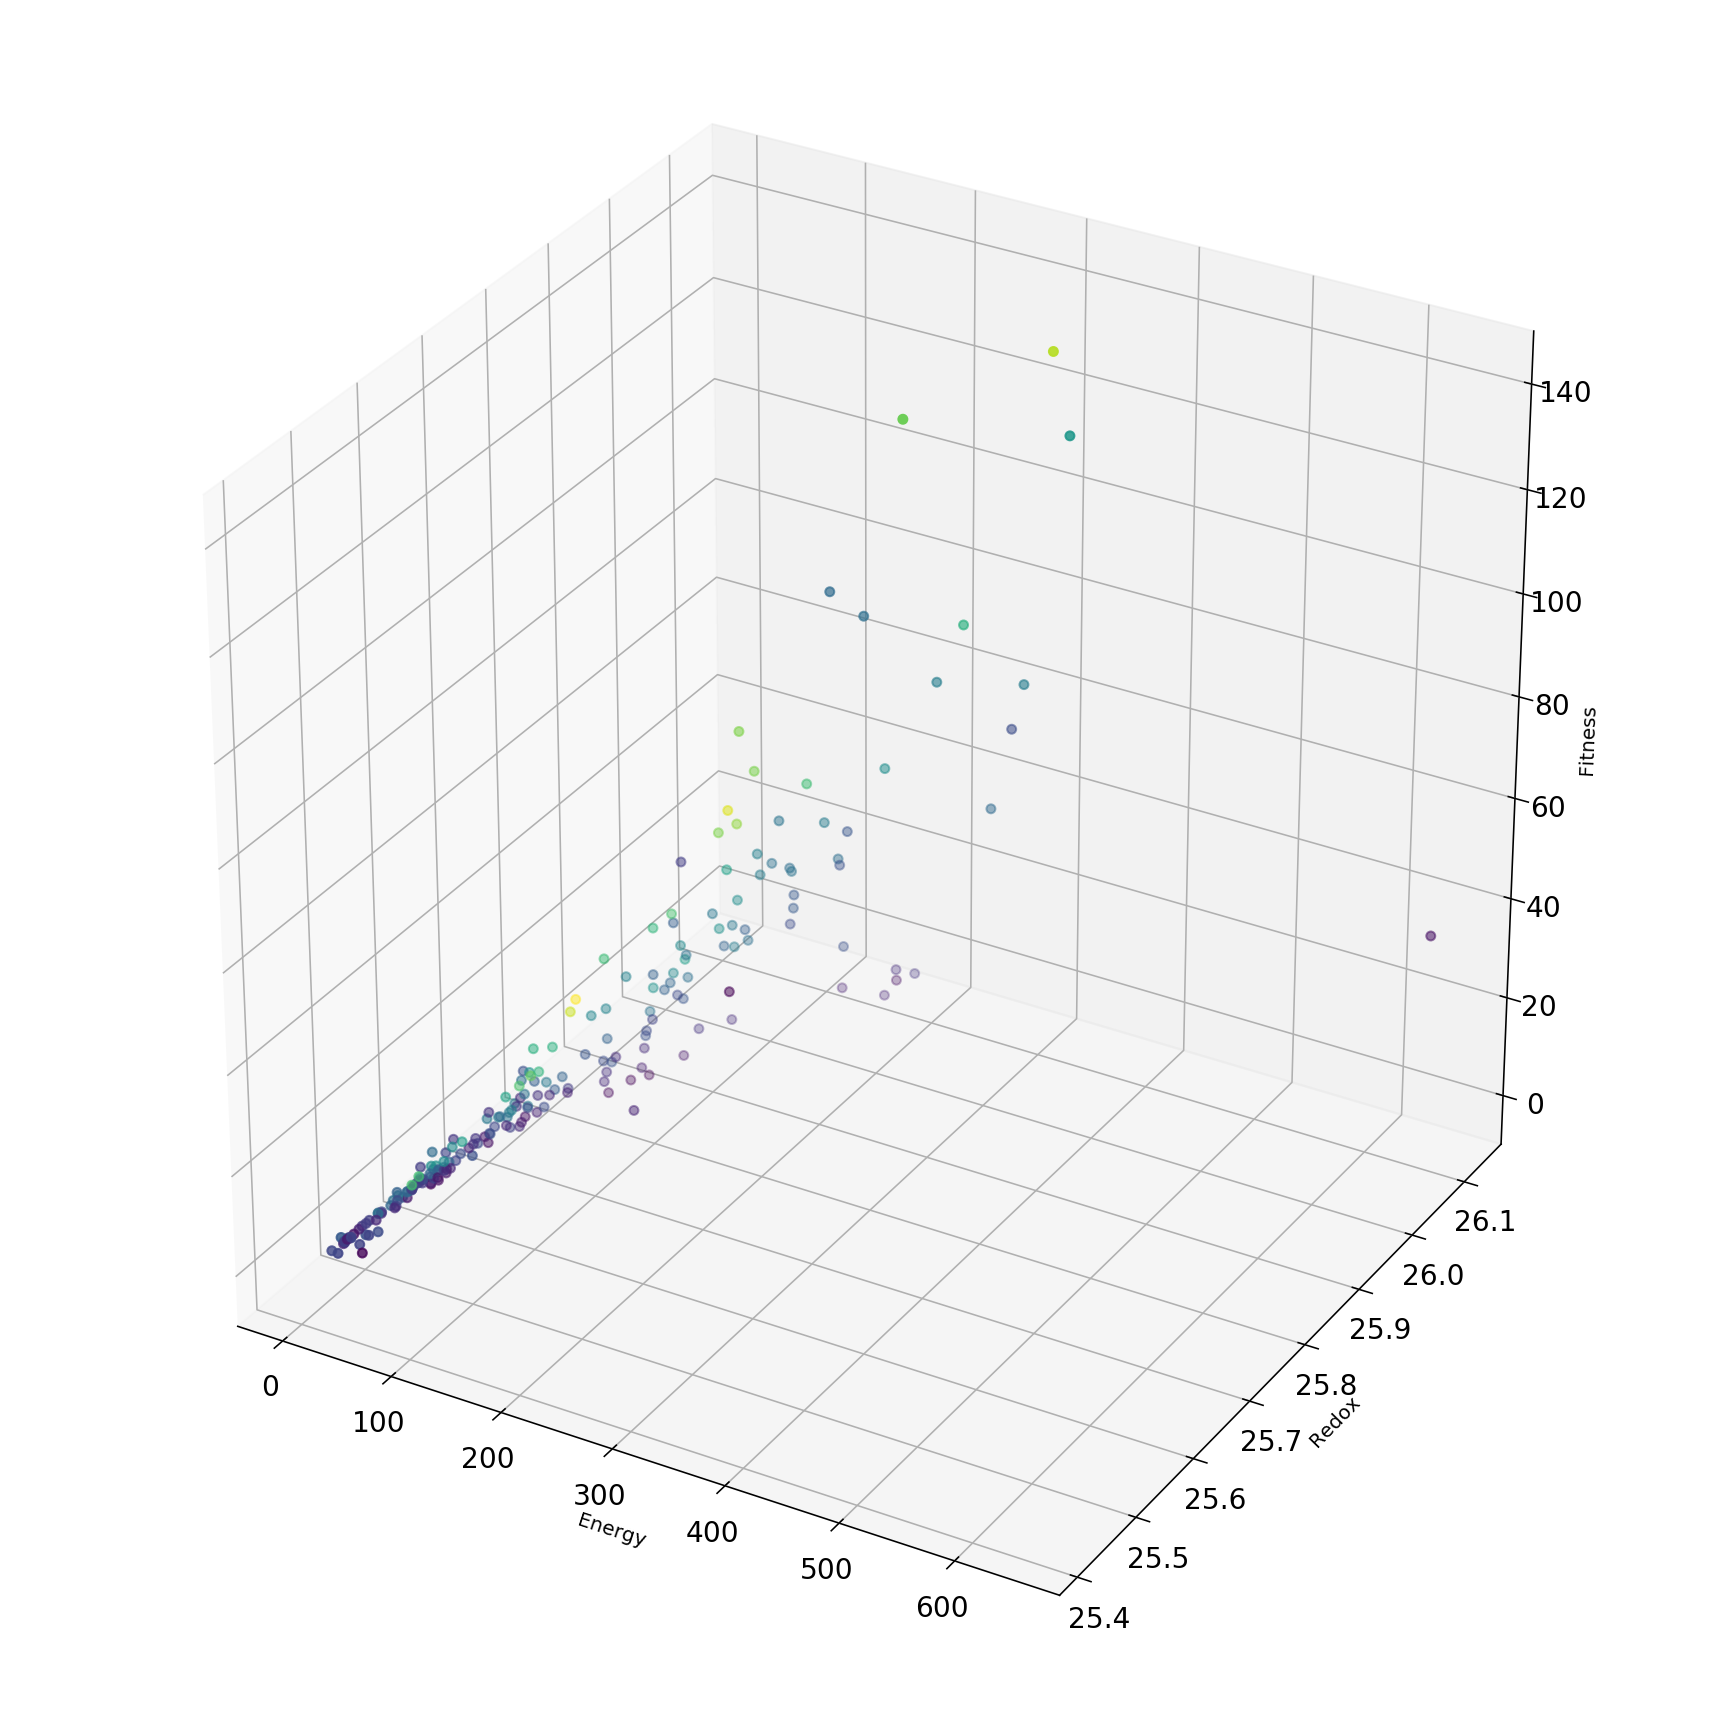

In [445]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in onepercent_gids:
    
    k = int(gid)
    
    if (k in redox): 
        if redox[k] > thresh:

            x.append(aec[k])
            y.append(redox[k])
            z.append(mf[k])

            custom_color.append(conn_aff_d[k])
            #custom_color.append(conn_eff_d[k])

ax.scatter(x, y, z, c=custom_color, cmap='viridis', marker='o')

ax.set_xlabel('Energy')
ax.set_ylabel('Redox')
ax.set_zlabel('Fitness')

plt.tight_layout()

plt.show()


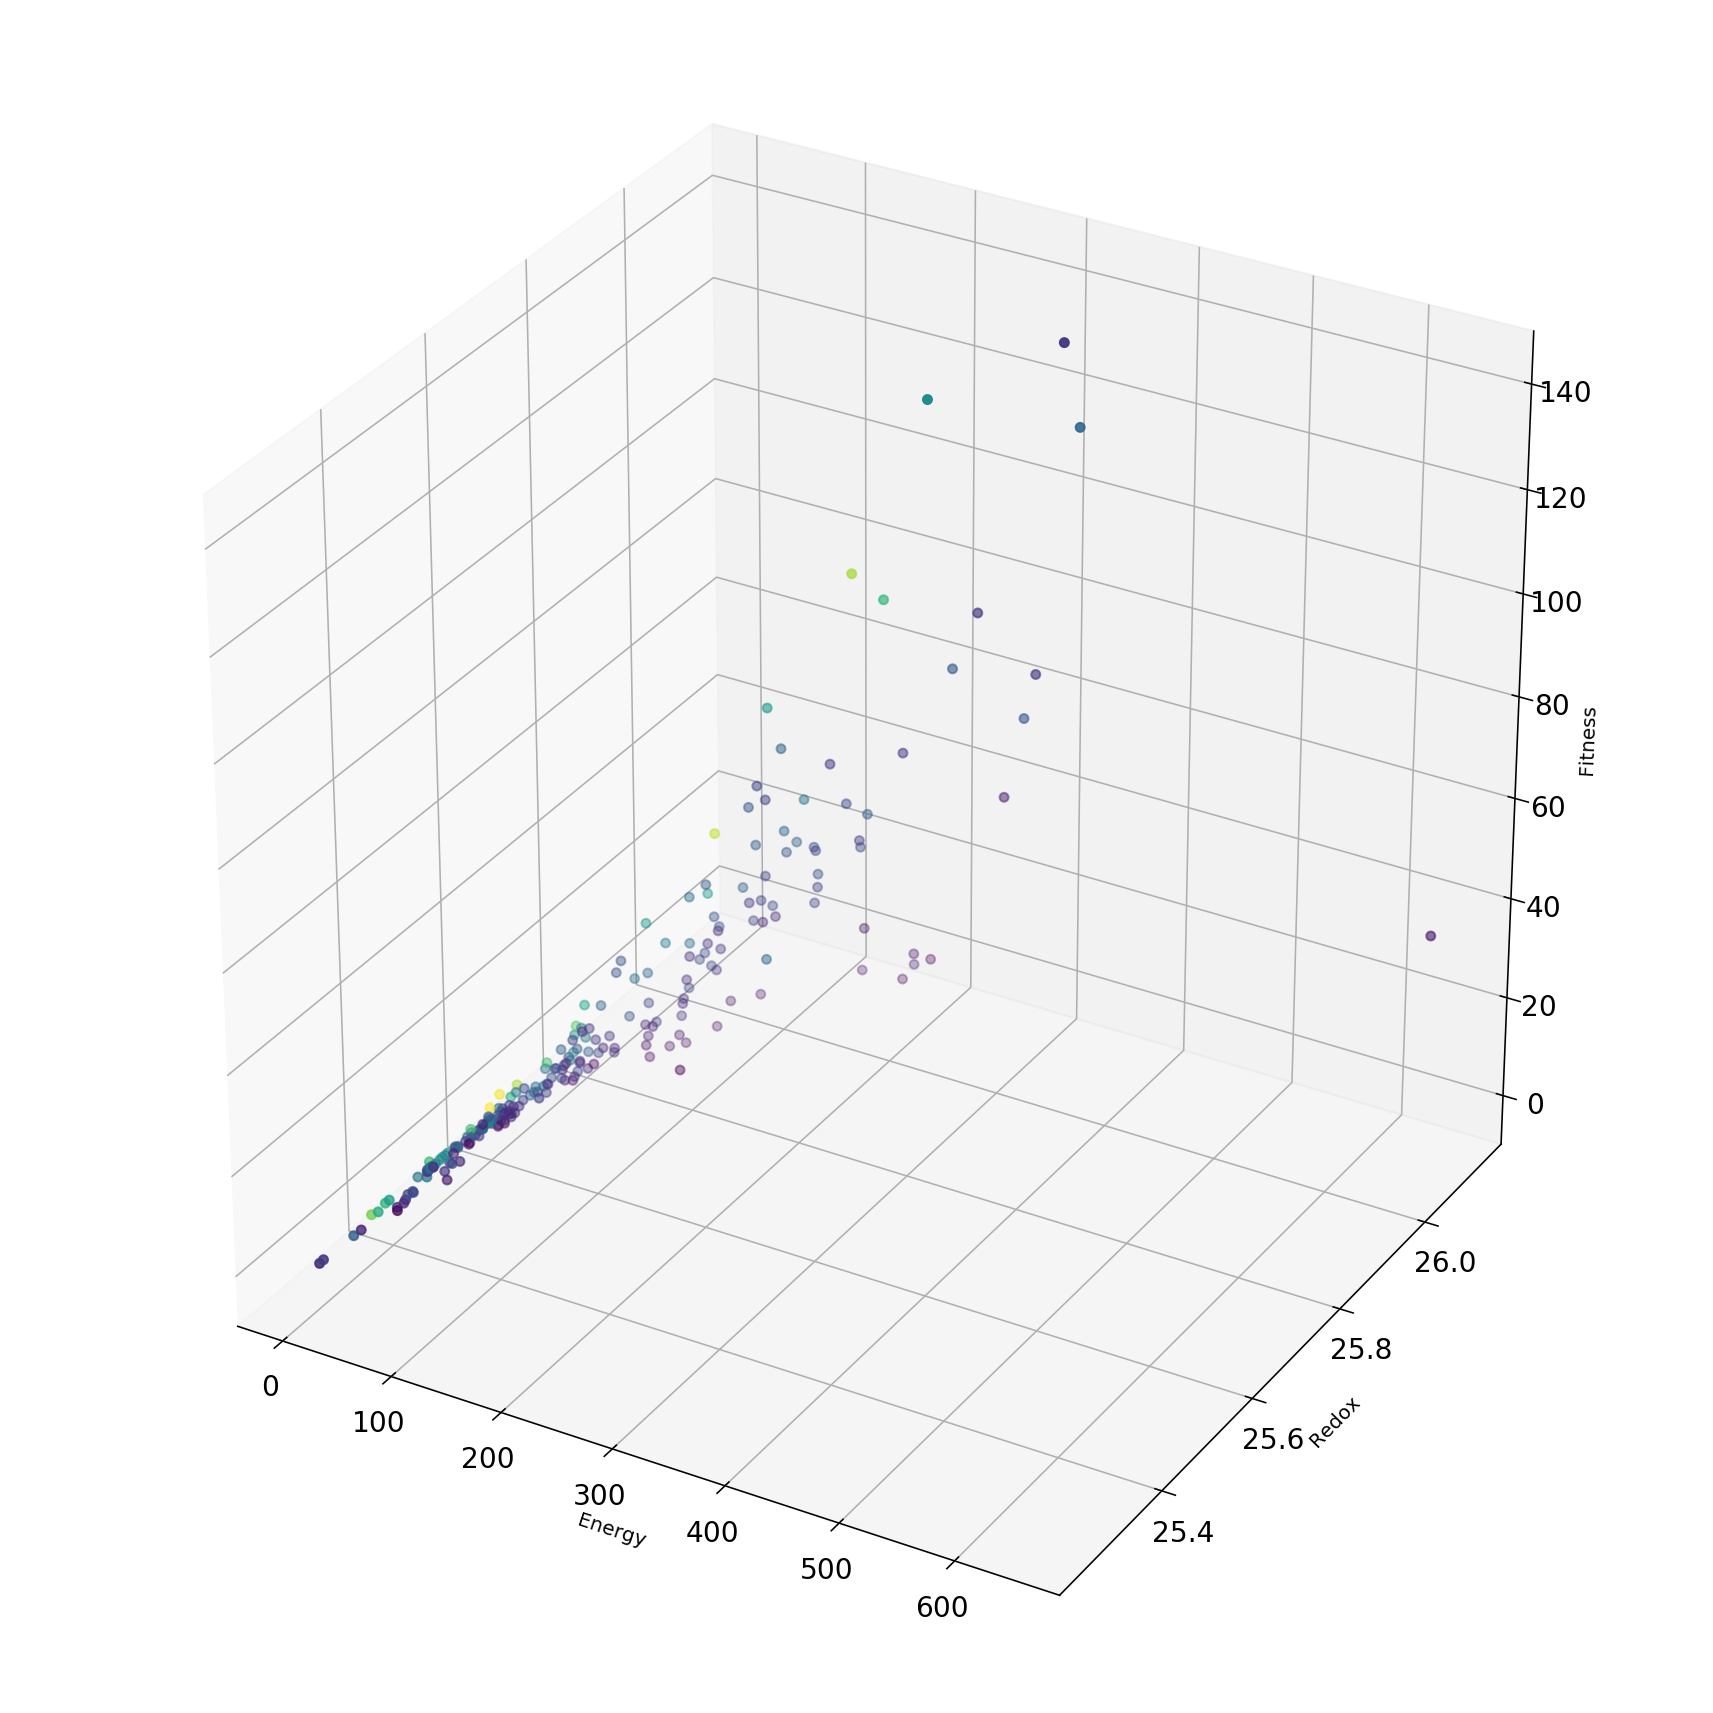

In [446]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in onepercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf[k])
        
        #custom_color.append(conn_aff_d[k])
        custom_color.append(conn_eff_d[k])

ax.scatter(x, y, z, c=custom_color, cmap='viridis', marker='o')

ax.set_xlabel('Energy')
ax.set_ylabel('Redox')
ax.set_zlabel('Fitness')

plt.tight_layout()

plt.show()


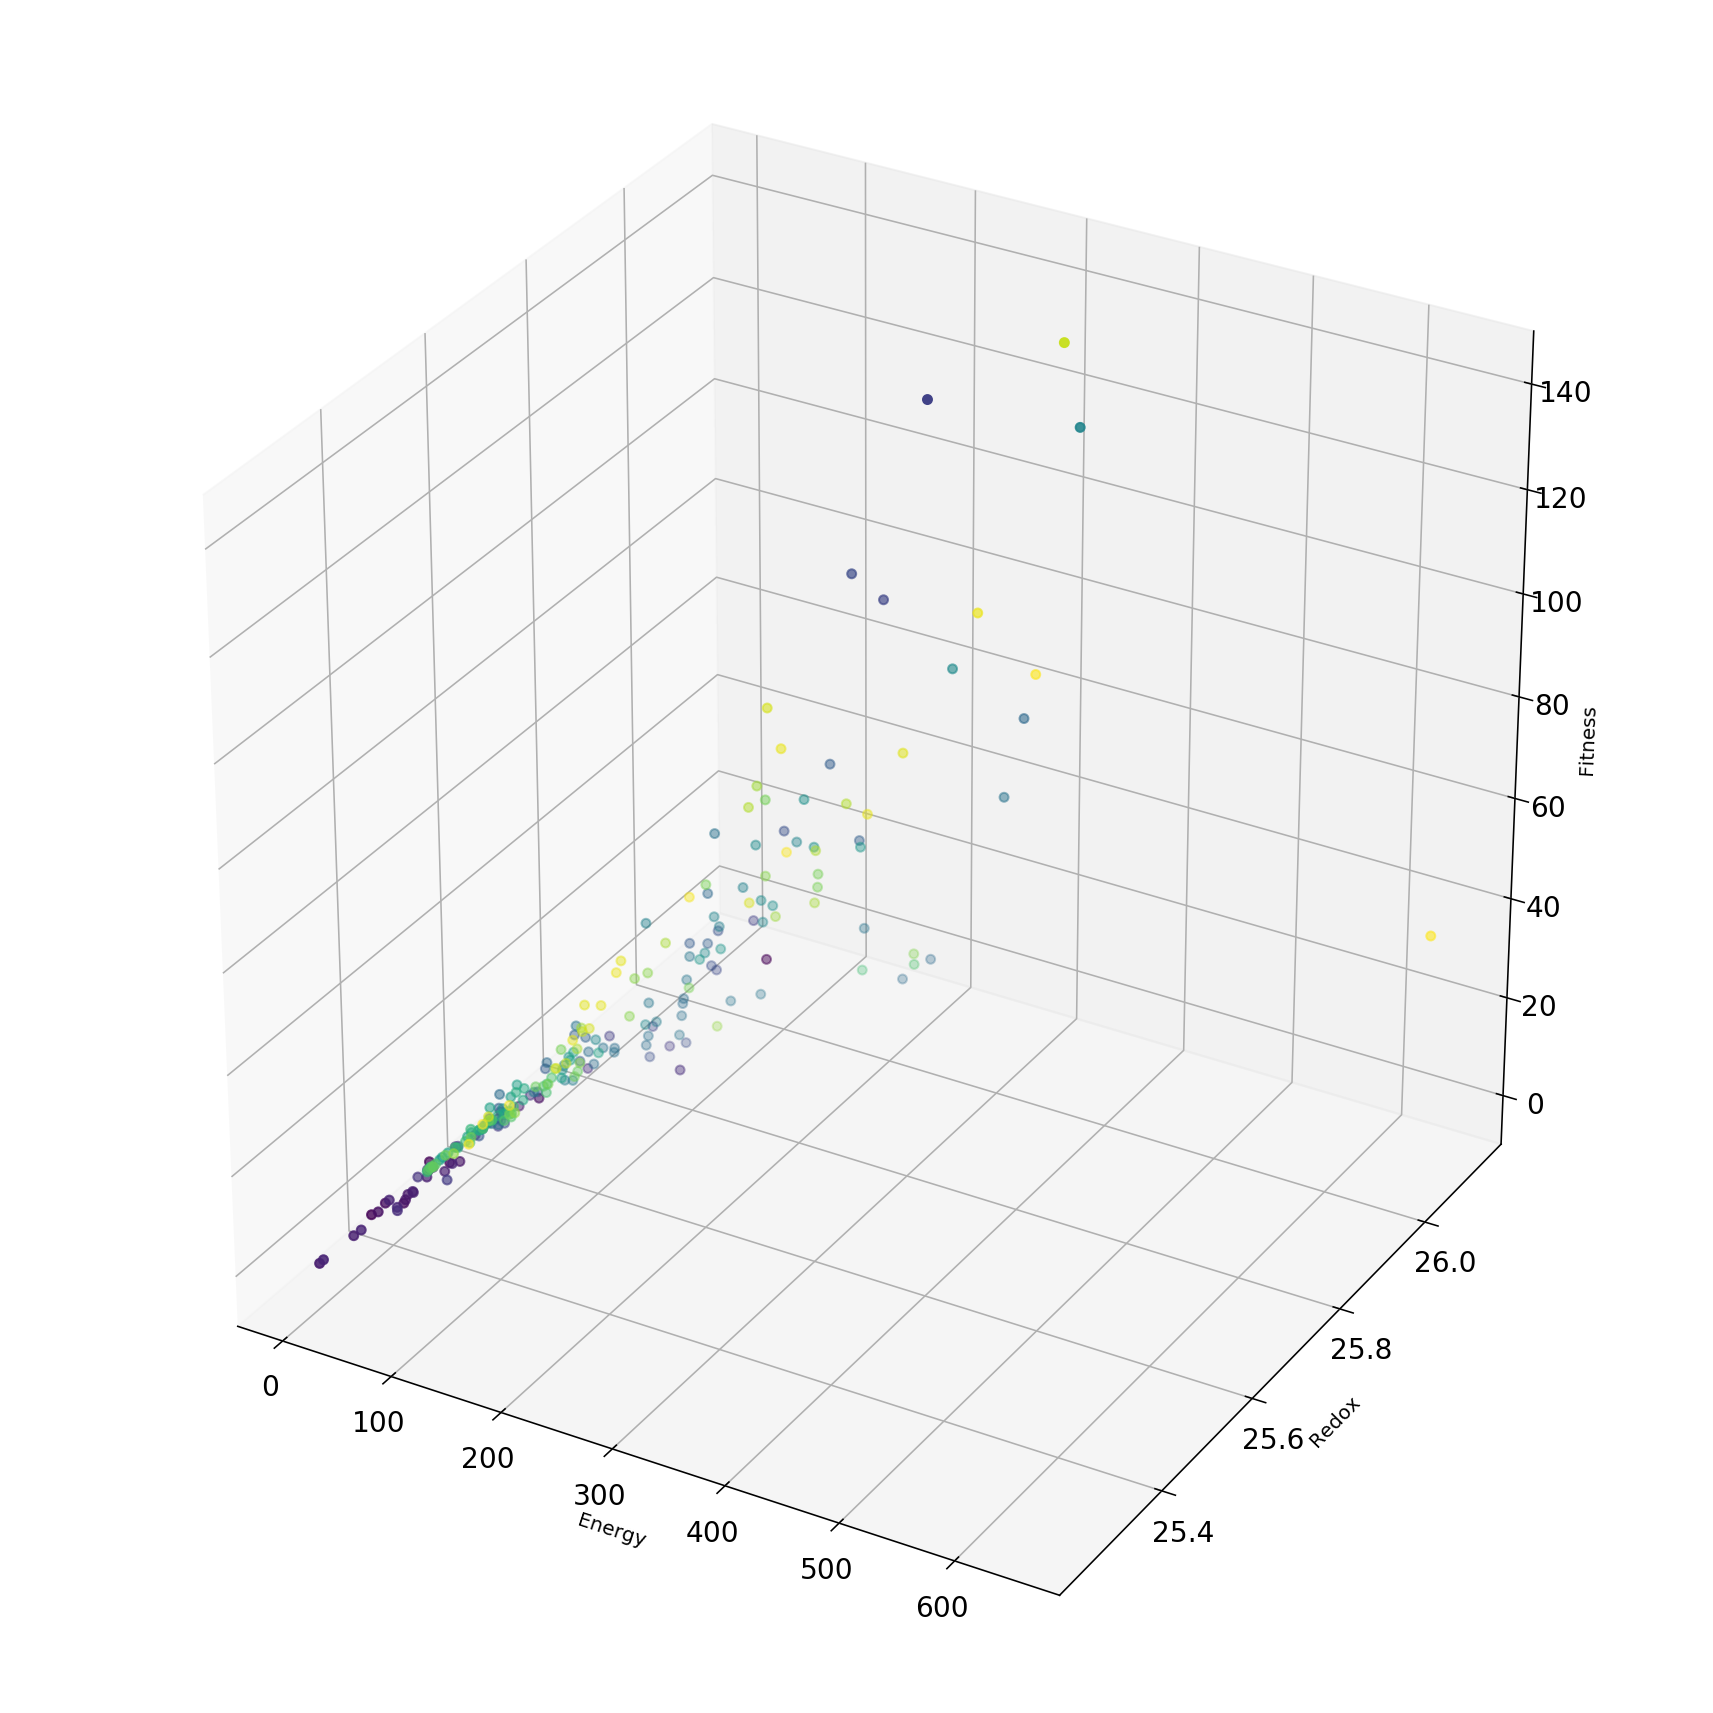

In [447]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in onepercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(k)


ax.scatter(x, y, z, c=custom_color, cmap='viridis', marker='o')

ax.set_xlabel('Energy')
ax.set_ylabel('Redox')
ax.set_zlabel('Fitness')

plt.tight_layout()

plt.show()


In [69]:
cells_layers_df.head()

region synapse_class etype   mtype  \
2      L1           INH  cNAC  L1_DAC   
3      L1           INH  cNAC  L1_DAC   
6      L1           INH  cNAC  L1_DAC   
11     L1           INH  cNAC  L1_DAC   
21     L1           INH  bNAC  L1_DAC   

                                             me_combo  
2   cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...  
3   cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...  
6   cNAC_L4CHC_L1_DAC_1_sm080723a1-4_idC_-_Scale_x...  
11               cNAC_L6NGC_L1_DAC_1_sm080723a1-4_idC  
21  bNAC_L23NGC_L1_DAC_1_sm100513a1-3_idC_-_Scale_...

In [70]:
len(cells_layers_df['etype'].unique())

11

In [71]:
etypes = cells_layers_df['etype'].unique()

In [72]:
cells_types = {}

for i,row in cells_layers_df.iterrows():
    
    if row.etype == etypes[0]:
        cells_types[i] = 1
    elif row.etype == etypes[1]:
        cells_types[i] = 2
    elif row.etype == etypes[2]:
        cells_types[i] = 3
    elif row.etype == etypes[3]:
        cells_types[i] = 4
    elif row.etype == etypes[4]:
        cells_types[i] = 5
    elif row.etype == etypes[5]:
        cells_types[i] = 6
    elif row.etype == etypes[6]:
        cells_types[i] = 7
    elif row.etype == etypes[7]:
        cells_types[i] = 8
    elif row.etype == etypes[8]:
        cells_types[i] = 9
    elif row.etype == etypes[9]:
        cells_types[i] = 10
    elif row.etype == etypes[10]:
        cells_types[i] = 11
        

In [73]:
cells_layers = {}

for i,row in cells_layers_df.iterrows():
    
    if row.region == 'L1':
        cells_layers[i] = 1
    elif row.region == 'L2':
        cells_layers[i] = 2
    elif row.region == 'L3':
        cells_layers[i] = 3
    elif row.region == 'L4':
        cells_layers[i] = 4
    elif row.region == 'L5':
        cells_layers[i] = 5
    elif row.region == 'L6':
        cells_layers[i] = 6
    

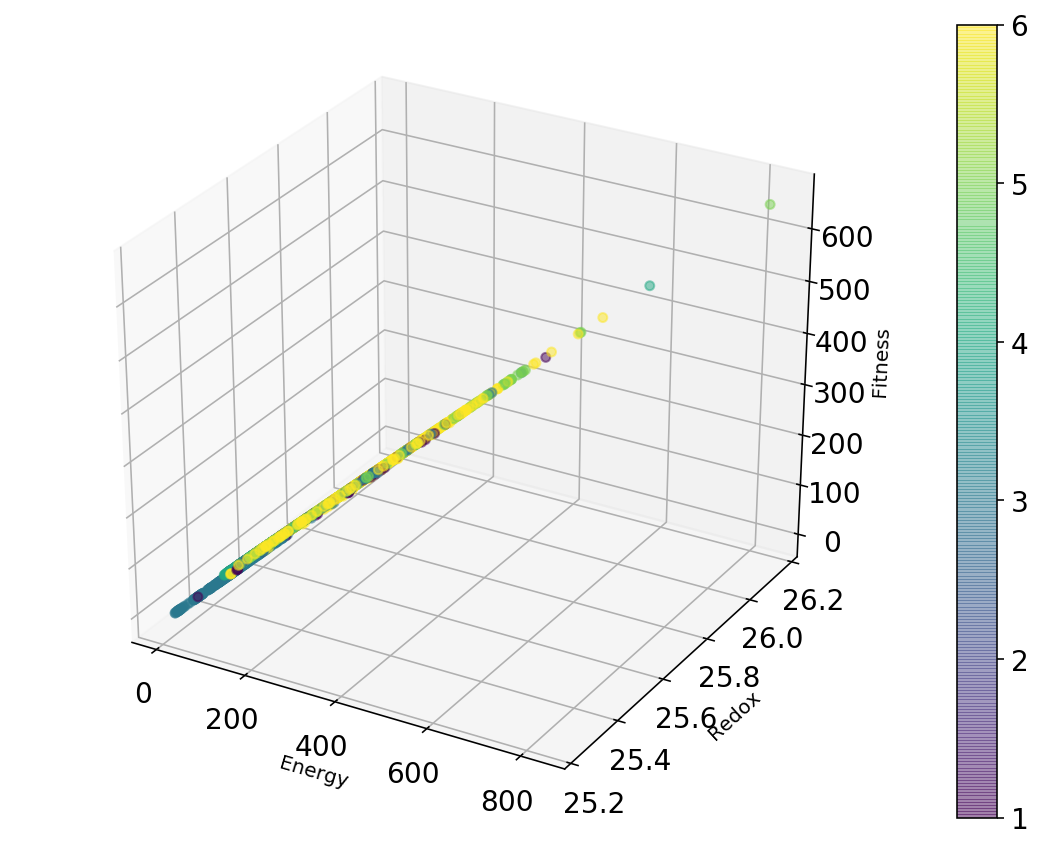

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in tenpercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf2[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(cells_layers[k])


tmp = ax.scatter(x,y, z, c=custom_color, cmap='viridis', marker='o', alpha=0.5)

ax.set_xlabel('Energy')
ax.set_ylabel('Redox')
ax.set_zlabel('Fitness')

fig.colorbar(tmp,ax=ax)

plt.tight_layout()

plt.show()


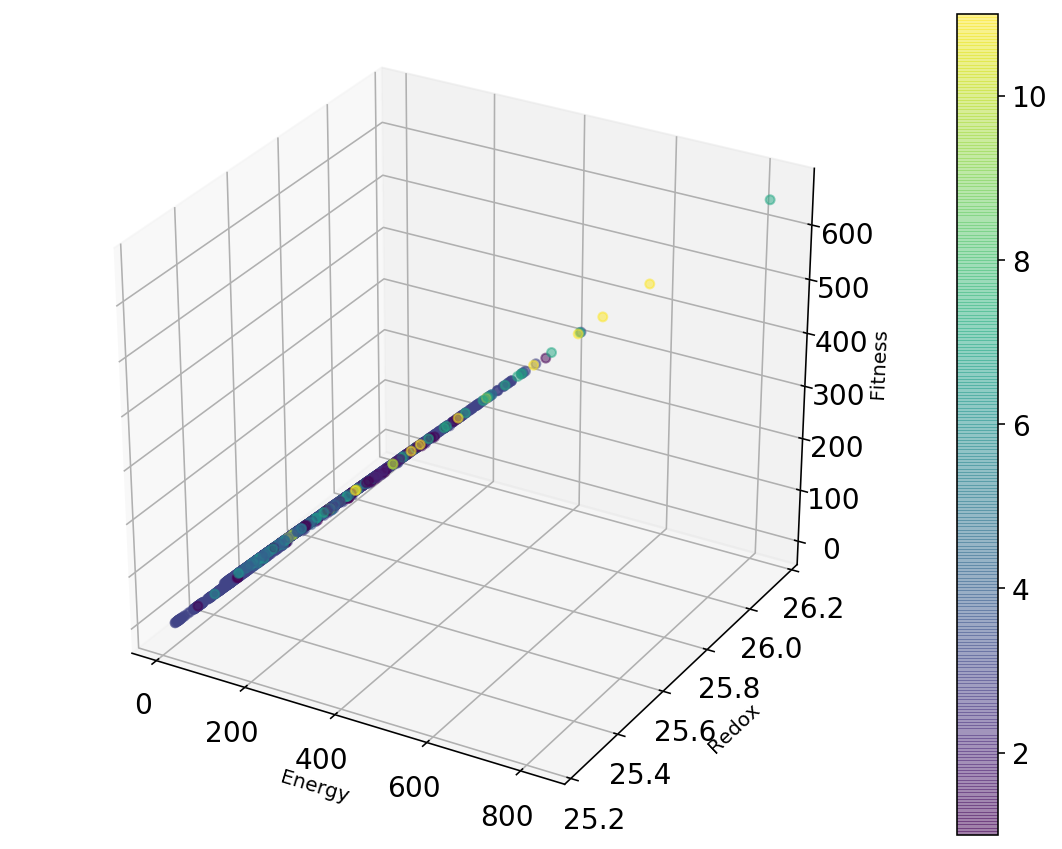

In [161]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in tenpercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf2[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(cells_types[k])


tmp = ax.scatter(x,y, z, c=custom_color, cmap='viridis', marker='o', alpha=0.5)

ax.set_xlabel('Energy')
ax.set_ylabel('Redox')
ax.set_zlabel('Fitness')

fig.colorbar(tmp,ax=ax)

plt.tight_layout()

plt.show()


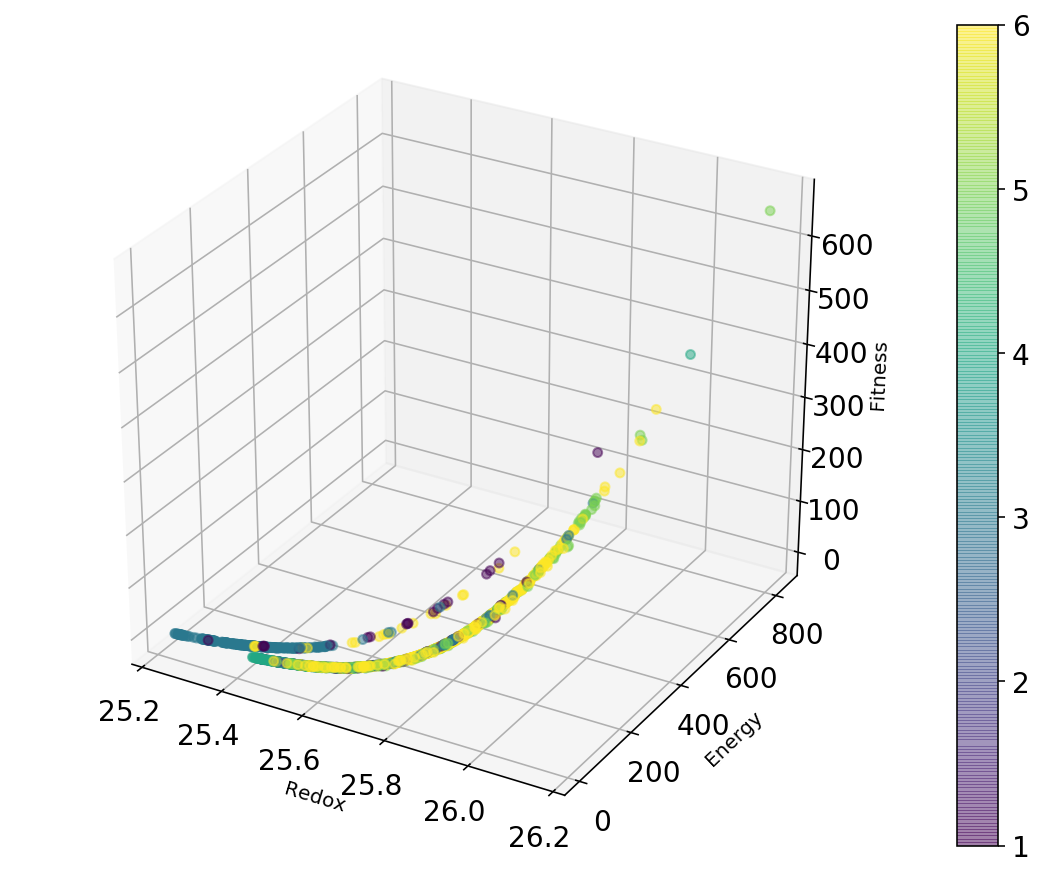

In [162]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in tenpercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf2[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(cells_layers[k])


tmp = ax.scatter(y, x, z, c=custom_color, cmap='viridis', marker='o', alpha=0.5)

ax.set_xlabel('Redox')
ax.set_ylabel('Energy')
ax.set_zlabel('Fitness')

plt.tight_layout()

fig.colorbar(tmp,ax=ax)

plt.show()


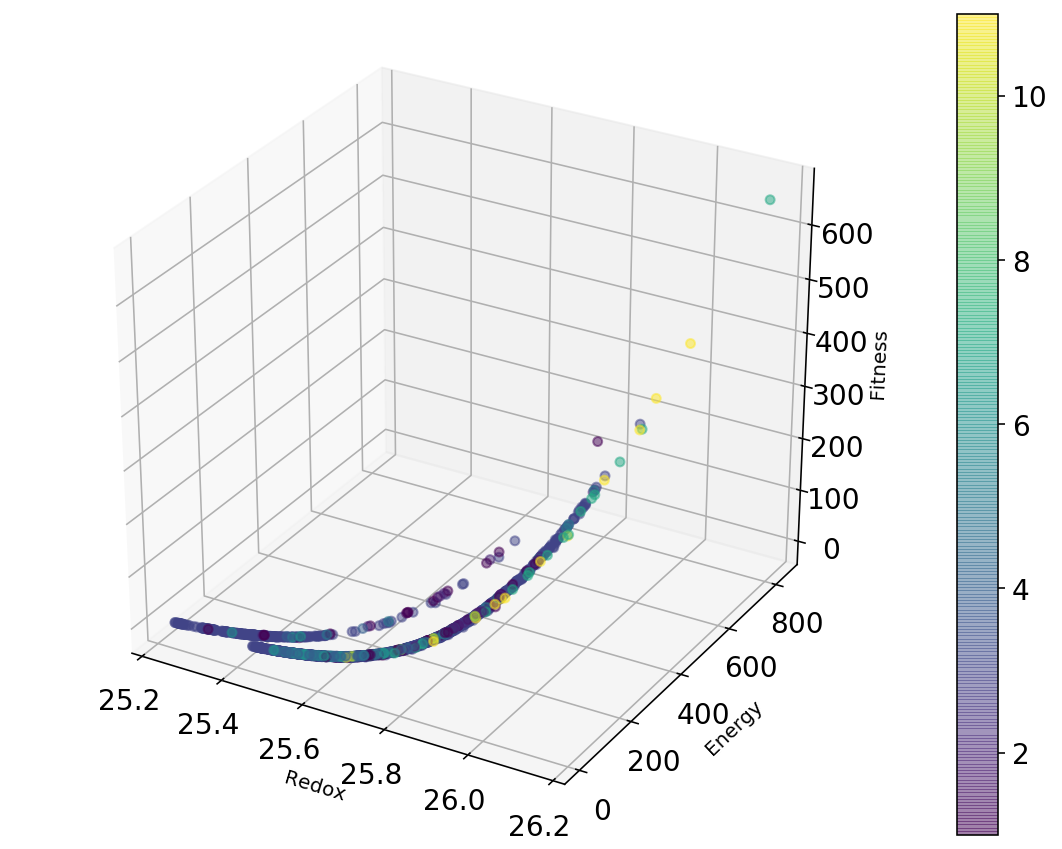

In [163]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
custom_color = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in tenpercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        x.append(aec[k])
        y.append(redox[k])
        z.append(mf2[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(cells_types[k])


tmp = ax.scatter(y, x, z, c=custom_color, cmap='viridis', marker='o', alpha=0.5)

ax.set_xlabel('Redox')
ax.set_ylabel('Energy')
ax.set_zlabel('Fitness')

plt.tight_layout()

fig.colorbar(tmp,ax=ax)

plt.show()


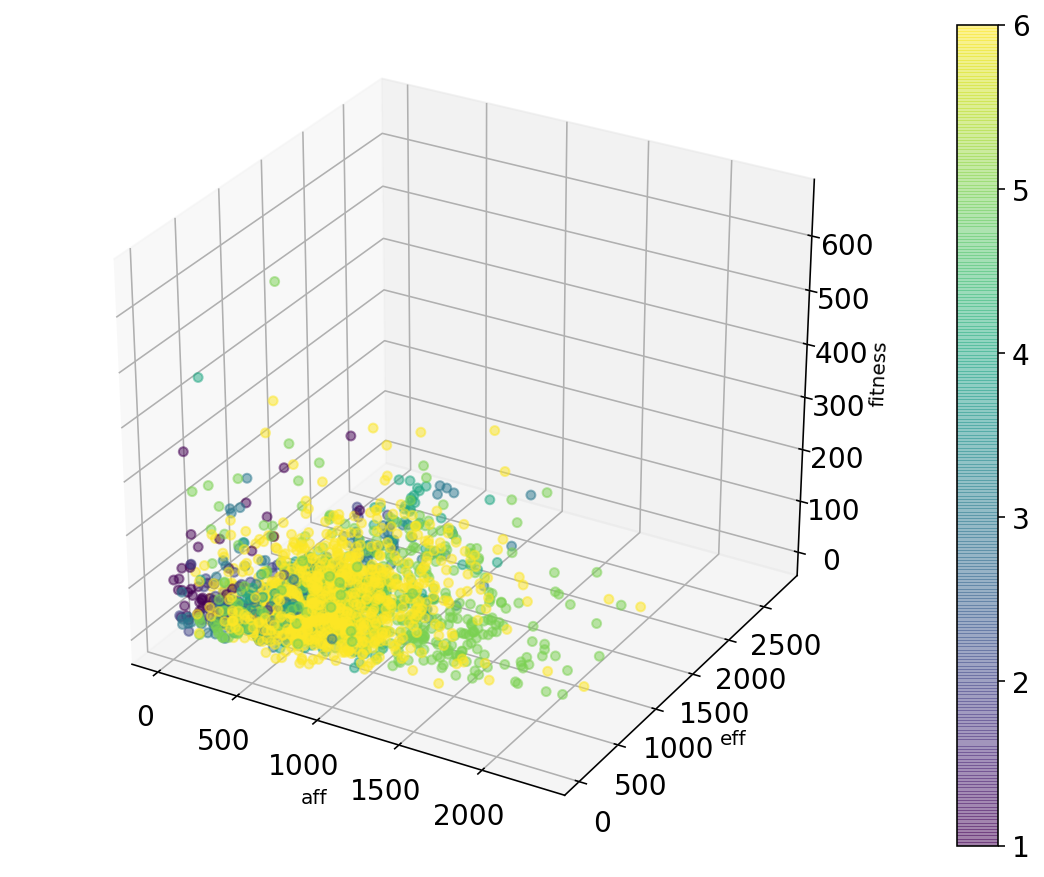

In [164]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# x = list(aec.values())
# y = list(redox.values())
# z = list(mf.values())

# x =[aec.items()]
# y = list(redox.values())
# z = list(mf.values())

x = []
y = []
z =[]
glcc = []
custom_color = []
effc = []
mf2plot = []

thresh = np.percentile(list(redox.values()),5) #np.median(list(redox.values()))

for gid in tenpercent_gids:
    
    k = int(gid)
    
    if (k in redox): 

        glcc.append(jGlc_n_d[k])
        x.append(aec[k])
        y.append(redox[k])
        mf2plot.append(mf2[k])
        z.append(conn_aff_d[k])
        effc.append(conn_eff_d[k])
        
        #custom_color.append(conn_aff_d[k])
        #custom_color.append(conn_eff_d[k])
        
        custom_color.append(cells_layers[k])


tmp = ax.scatter(z, effc, mf2plot, c=custom_color, cmap='viridis', marker='o', alpha=0.5)

ax.set_xlabel('aff')
ax.set_ylabel('eff')
ax.set_zlabel('fitness')

plt.tight_layout()

fig.colorbar(tmp,ax=ax)

plt.show()


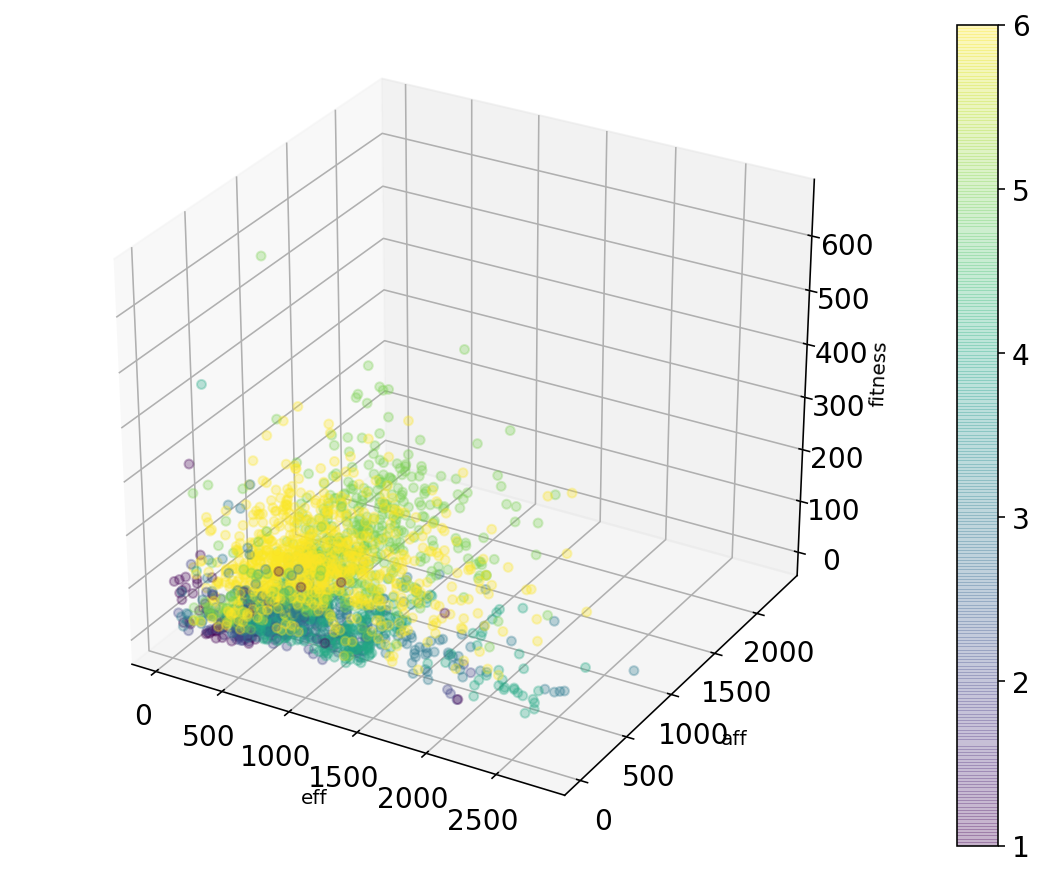

In [168]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')


tmp = ax.scatter(effc, z, mf2plot, c=custom_color, cmap='viridis', marker='o', alpha=0.3)

ax.set_xlabel('eff')
ax.set_ylabel('aff')
ax.set_zlabel('fitness')

plt.tight_layout()

fig.colorbar(tmp,ax=ax)

plt.show()


In [173]:
allc = []

for k in range(0,len(z)):
    allc.append(z[k] + effc[k])

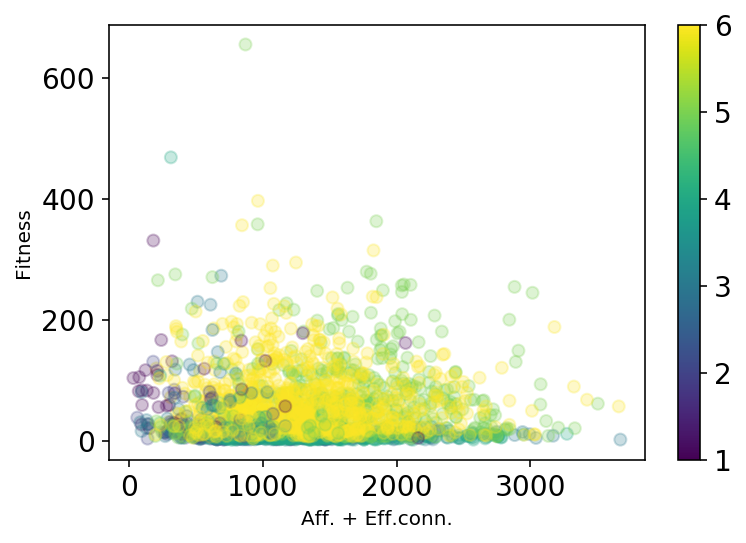

In [174]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(allc,mf2plot, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Aff. + Eff.conn.')
#ax.set_xlabel('Energy')
ax.set_ylabel('Fitness')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

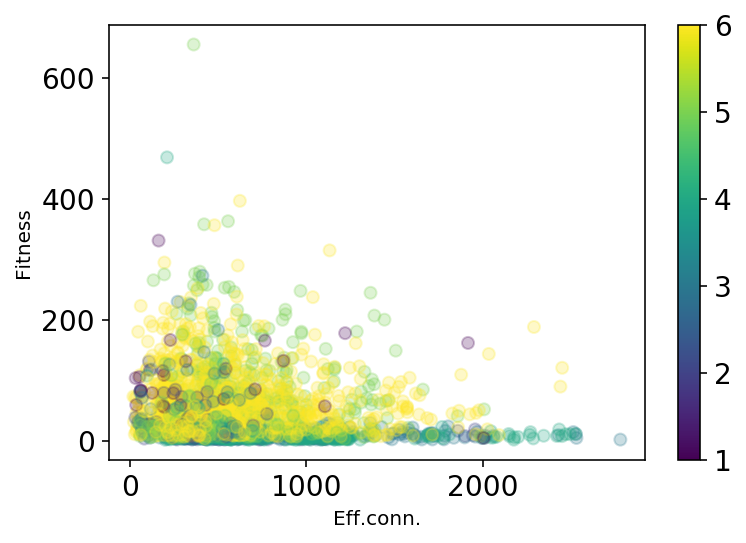

In [170]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(effc,mf2plot, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Eff.conn.')
#ax.set_xlabel('Energy')
ax.set_ylabel('Fitness')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

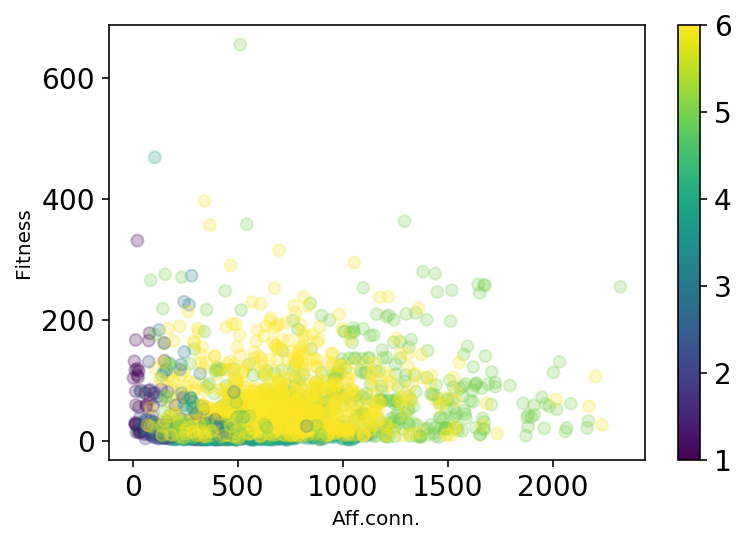

In [171]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(z,mf2plot, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Aff.conn.')
#ax.set_xlabel('Energy')
ax.set_ylabel('Fitness')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

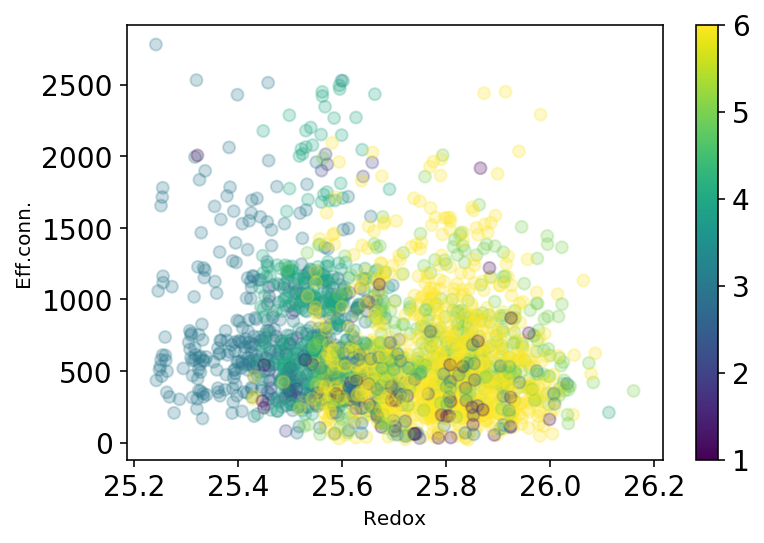

In [157]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(y, effc, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Redox')
#ax.set_xlabel('Energy')
ax.set_ylabel('Eff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

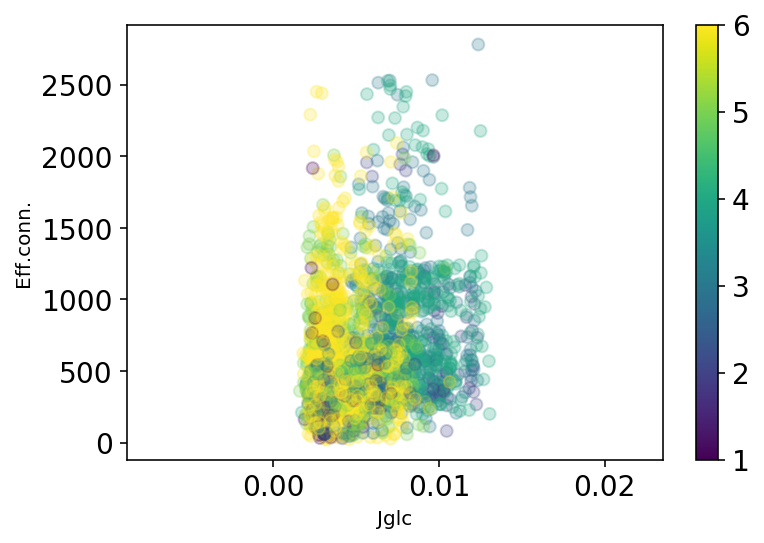

In [158]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(glcc, effc, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Jglc')
#ax.set_xlabel('Energy')
ax.set_ylabel('Eff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

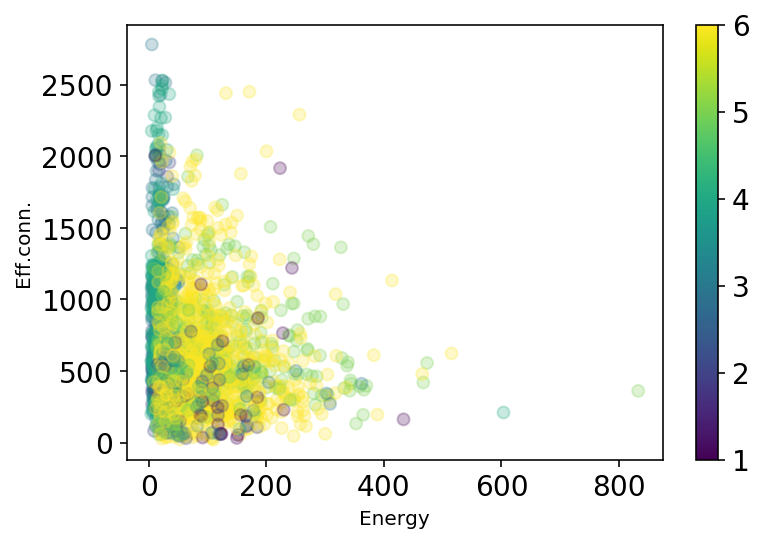

In [175]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(x, effc, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

#ax.set_xlabel('Redox')
ax.set_xlabel('Energy')
ax.set_ylabel('Eff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

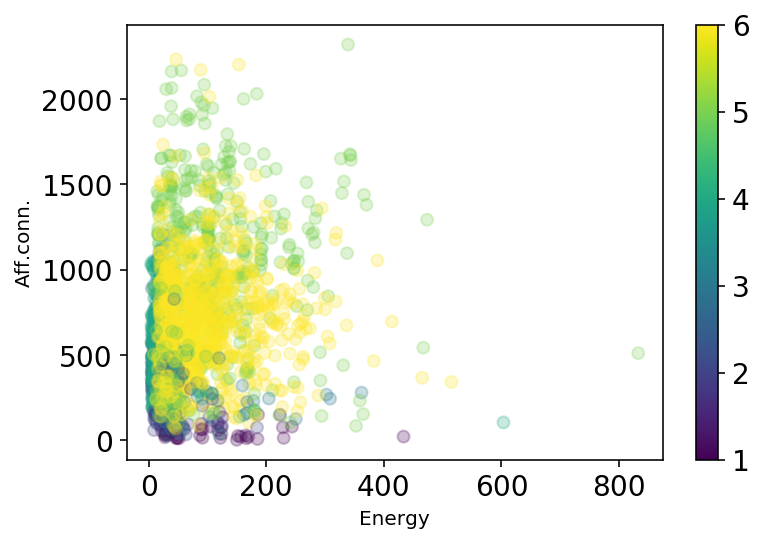

In [176]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(x, z, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

#ax.set_xlabel('Redox')
ax.set_xlabel('Energy')
ax.set_ylabel('Aff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

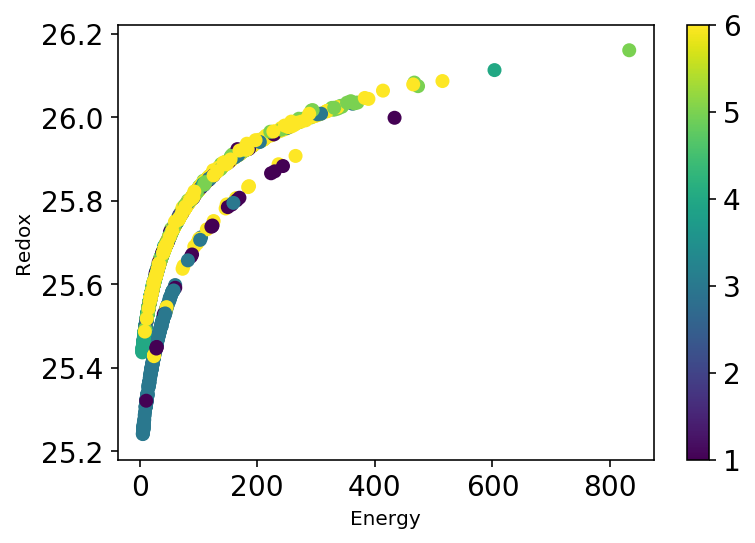

In [152]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(x, y, color=cmap(norm(custom_color)))
#ax.set_xticks(x)

ax.set_ylabel('Redox')
ax.set_xlabel('Energy')
#ax.set_zlabel('Fitness')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

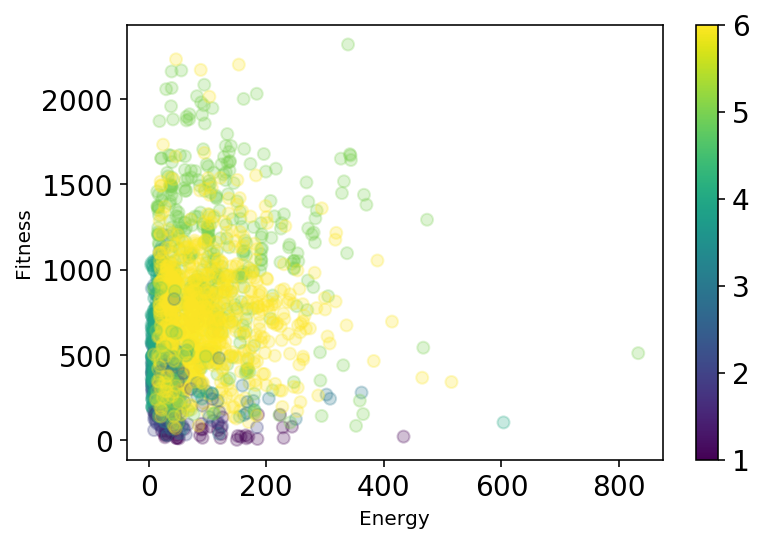

In [151]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(x, z, color=cmap(norm(custom_color)), alpha=0.25)

#ax.set_xlabel('Redox')
ax.set_xlabel('Energy')
ax.set_ylabel('Fitness')

#ax.set_xticks(x)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

plt.show()

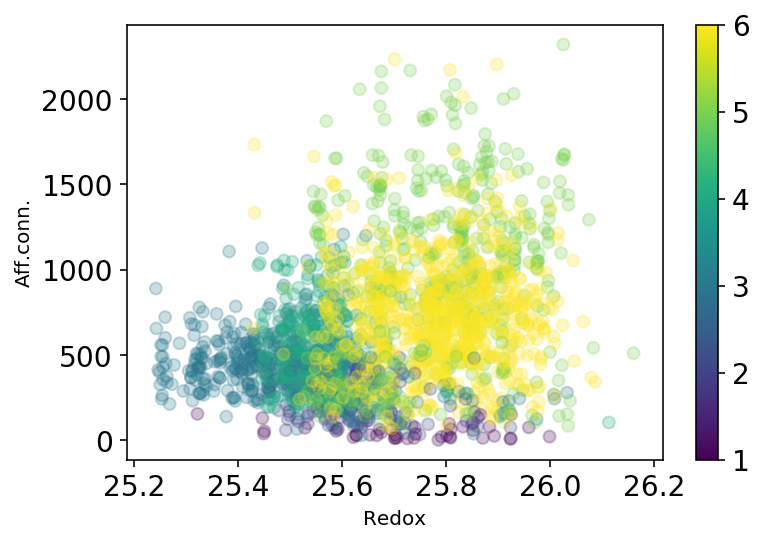

In [153]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(y, z, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Redox')
#ax.set_xlabel('Energy')
ax.set_ylabel('Aff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

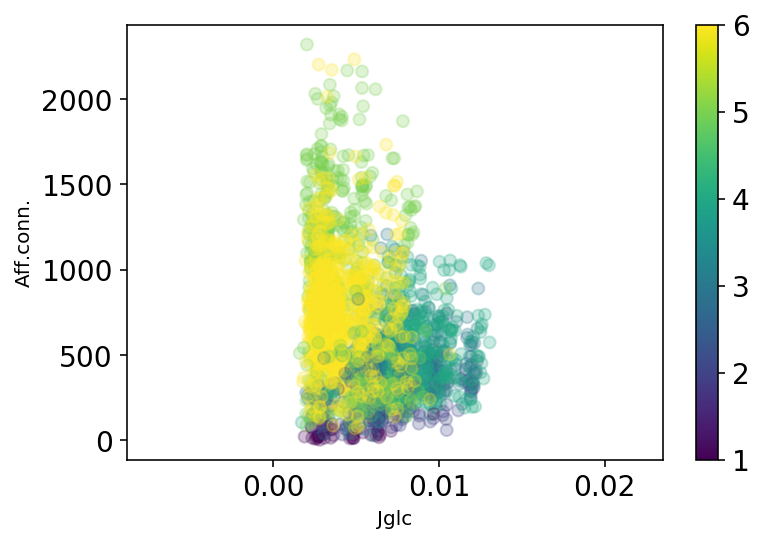

In [155]:
from matplotlib import pyplot as plt, colors

fig, ax = plt.subplots()
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=1.0, vmax=6.0)
ax.scatter(glcc, z, color=cmap(norm(custom_color)), alpha=0.25)
#ax.set_xticks(x)

ax.set_xlabel('Jglc')
#ax.set_xlabel('Energy')
ax.set_ylabel('Aff.conn.')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
plt.show()

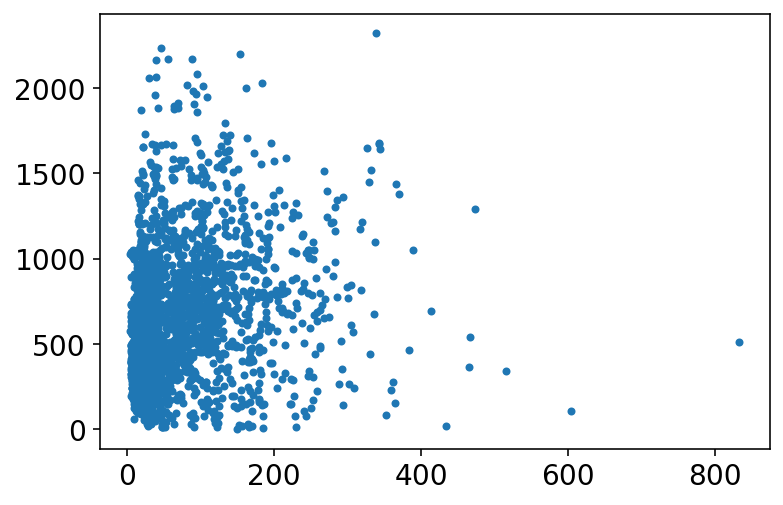

In [144]:
plt.plot(x,z,".")
plt.show()

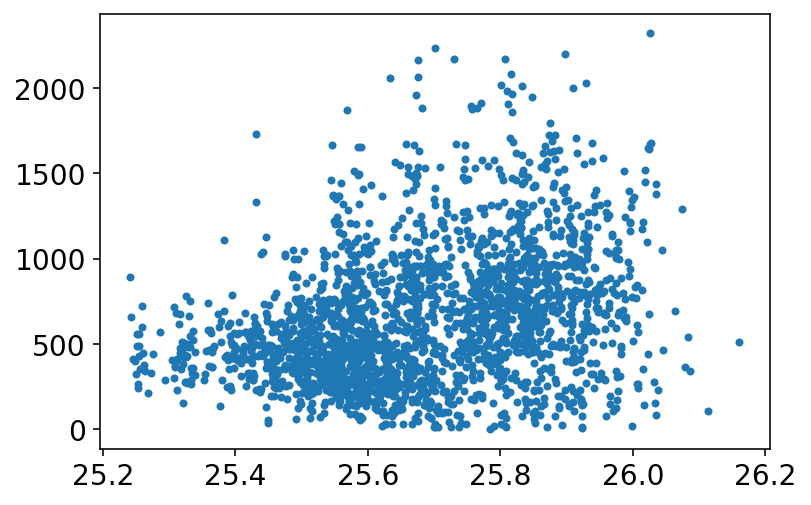

In [145]:
plt.plot(y,z,".")
plt.show()

In [456]:
custom_colors = plt.cm.jet(np.linspace(min(list(conn_aff_d.values())),max(list(conn_aff_d.values())),len(list(conn_aff_d.values()))))


In [349]:
#jLac_n_d[136122]
max(jLac_n_d.items(), key = lambda k : k[1])

(88927, 0.0008338268767152514)

In [101]:
coeff_substr_input*(np.median(jGlc_n) + np.median(jLac_n))

0.001551559250314631

In [139]:
np.median(jGlc_n)

0.0012212479385797174

In [127]:
# NAD/NADH

coeff_ros_output*np.median(um.loc[0:um.shape[0],36]/um.loc[0:um.shape[0],34])

26.382225308132377

In [169]:
min(um.loc[um[2]<10,34])

0.0011446085469795704

In [170]:
min(um.loc[0:um.shape[0],36])

0.030054767643018444

In [99]:
np.median((um.loc[0:um.shape[0],30] + 0.5*um.loc[0:um.shape[0],32])/(um.loc[0:um.shape[0],30] + um.loc[0:um.shape[0],32]))

0.9996236766052702

In [97]:
max((um.loc[0:um.shape[0],30] + 0.5*um.loc[0:um.shape[0],32])/(um.loc[0:um.shape[0],30] + um.loc[0:um.shape[0],32]))

0.9996452693353718

In [96]:
min((um.loc[0:um.shape[0],30] + 0.5*um.loc[0:um.shape[0],32])/(um.loc[0:um.shape[0],30] + um.loc[0:um.shape[0],32]))

0.9909050298705598

In [ ]:
um.loc[1,31]